# Сборный проект.

#  Выявление закономерностей, определяющих успешность игры.  

В нашем распоряжении данные о о продажах игр, оценки пользователей и экспертов, жанры и платформы популярного  интернет-магазина «Стримчик». Нам необходимо исследовать данные и выявить закономерности, определяющие успешность игры. В последствии, это позволит определить потенциально популярный продукт, сделать ставку на него и спланировать рекламные кампании.

В процессе исследования данных, мы проведем их предобработку, всесторонне изучим их, составим портрет пользователя каждого региона, а так же проверим гипотезы. На основании проведенного исседования предоставим выводы

<a id="ogl"></a>
## Оглавление

* [Оглавление](#ogl)
* [Предустановки](#setup)
    * [Установка необходимых библиотек](#setup1)
    * [Установка необходимых настроек](#setup2)
    * [Создание необходимых функций для автоматизации исследования](#setup3)       
* [Загрузка данных и первое знакомство с данными](#load_data)
    * [Описание данных](#load_data1)
    * [Загрузка данных](#load_data2)
    * [Первая информация по данным](#load_data3)
    * [Выводы](#load_data4)
* [Предобработка данных](#predobr_data)
    * [Приведение имен столбцов к единому стилю](#predobr_data1)
    * [Столбец name](#predobr_data2)   
        * [Вывод](#predobr_data21)    
    * [Столбец year_of_release](#predobr_data3)   
        * [Вывод](#predobr_data31)
    * [Столбец critic_score](#predobr_data4)   
        * [Вывод](#predobr_data41)
    * [Столбец user_score](#predobr_data5)   
        * [Вывод](#predobr_data51)
    * [Столбец rating](#predobr_data6)   
        * [Вывод](#predobr_data61)
    * [Столбцы platform и genre](#predobr_data7)   
        * [Вывод](#predobr_data71)
    * [Добавление столбца продаж игры по всему миру](#predobr_data8)
    * [Добавление столбца с типом платформы](#predobr_data9)
    * [Выводы по предобработке данных](#predobr_data9)
* [Исселователький анализ данных](#analis_data)
    * [Анализ выпуска игр по годам](#analis_data1)
        * [Вывод](#analis_data11)
    * [Анализ продаж по платформам](#analis_data2)
        * [Вывод](#analis_data21) 
    * [Определеие актуального периода для построения прогноза продаж](#analis_data3)
    * [Анализ актуального периода данных](#analis_data4)
        * [Вывод](#analis_data41)    
    * [Анализ влияния отзывов на продажи внутри популярной и других платформ](#analis_data5)
        * [Вывод](#analis_data51) 
    * [Анализ распределения игр по жанрам](#analis_data6)
        * [Вывод](#analis_data61)
    * [Выводы по исследовательскому анализу данных](#analis_data7)
* [Анализ портрета пользователей регионов Северной Америки, Европы и Японии](#analis_user_data)
    * [ТОП-5 самых популярных платформ пользователей анализируемых регионов](#analis_user_data1)
        * [Вывод](#analis_user_data11)
    * [ТОП-5 самых популярных жанров видеоигр пользователей анализируемых регионов](#analis_user_data2)
        * [Вывод](#analis_user_data21)
    * [Влияние рейтинга ESRB на продажи в отдельном регионе](#analis_user_data3)
        * [Вывод](#analis_user_data31)        
    * [Общие выводы по анализу пользователей регионов Северной Америки, Европы и Японии](#analis_user_data4)
* [Проверка гипотез](#chack_hyp)
    * [Средние пользовательские рейтинги платформ Xbox One и PC одинаковые](#chack_hyp1)
        * [Вывод](#chack_hyp11)
    * [Средние пользовательские рейтинги жанров Action и Sports разные](#chack_hyp2)
        * [Вывод](#chack_hyp21)
* [Общий вывод по исследованию](#conclusion_project)

<a id="setup"></a>
## Предустановки

<a id="setup1"></a>
### Установка необходимых библиотек

In [1]:
# установим необходимые библиотеки
import pandas as pd
import numpy as np
from scipy import stats as st
import warnings
import random
import re
import matplotlib.pyplot as plt
import seaborn as sns

<a id="setup2"></a>
### Создание необходимых настроек

In [2]:
# запрет вывода больших чисел в научной нотации и разрешение выводить два десятичных знака после запятой
pd.set_option('display.float_format', '{:.2f}'.format)
# убираем предупреждения
warnings.filterwarnings("ignore")
# установим стиль отображения графика
sns.set(style='white')

<a id="setup3"></a>
### Создание необходимых функций для автоматизации исследования

In [3]:
# функция вывода основных данных по датафрейму
def first_data(df):
    print('Первые 5 строк датафрейма:')      
    display(df.head())
    print()
    print('Общая информамия по каждому столбцу датафрейма:')

    stat_df = pd.DataFrame({
        'count': df.count(), 
        'count_isna': df.isna().sum(),
        'perc_isna%': df.isna().mean()*100,   
        'nunique': df.nunique(),    
        'min': df.min(),
        'max': df.max(),
        'dtype':df.dtypes
                       }).reset_index()
    stat_df.rename(columns={'index': 'columns'}, inplace=True)
    stat_df['columns'] = pd.Categorical(stat_df['columns'], categories=df.columns, ordered=True)
    stat_df = stat_df.sort_values('columns').set_index('columns')
    display(stat_df)
    #display(stat_df)
    print(f'Количесвтво строк-дубликатов в датафрейме: {df.duplicated().sum()}')

In [4]:
# функция извлечения года выпуска игры из её названия
def year_in_name(name_game):
    for item in range(1980, 2017):
        if str(item) in name_game.split(' '):
            return item

In [5]:
# функция извлечения года выпуска игры из других платформ
def year_in_platform(name_game):
    df_ng = df_games.loc[(df_games['name'] == name_game) & (df_games['year_of_release'].notna())]
    if df_ng['year_of_release'].min() == df_ng['year_of_release'].max():
        return df_ng['year_of_release'].min()
    else:
        return None

In [6]:
# функция подсчета процентного отношения отобрнных строк данных ко всем строкам
def percent_group_row(column, value):
   return (
       print(f"Число отобранных строк равно {value}, и составляет {round(value / df_games.shape[0] * 100, 2)}% от общего числа данных")
   )

In [7]:
# функция изменения типа данных
def convert_data_type(column, type_data):
    dict_type = {
        'int64': pd.Int64Dtype(),
        'int32': pd.Int32Dtype(),
        'str': pd.StringDtype(),
        'float64': pd.Float64Dtype(),
        'float32': pd.Float32Dtype(),
        'bool': pd.BooleanDtype(),
        'category': pd.CategoricalDtype()
    }
    df_games[column] = pd.to_numeric(df_games[column], errors='coerce')
    if df_games[column].dtype == 'object' and type_data != str:
        df_games[column] = pd.to_numeric(df_games[column], errors='coerce')
    df_games[column] = pd.array(df_games[column], dtype=dict_type[type_data])
    
    return print(f'Тип данных столбца {column} успешно изменен на {df_games[column].dtype}')

In [8]:
# построение bar графиков
def bar_graph(data, title='', kind='bar', col=[0, 1], med=False):
    
    dic_lab = {
        'count': 'Количество',
        'platform': 'Платформа',
        'year_of_release': 'Год релиза',
        'genre': 'Жанр',
        'critic_score': 'Оценка критиков',
        'user_score': 'Оценка пользователей',
        'all_sales': 'Мировые продажи, (млн. шт.)',
        'yers_life': 'Количество лет',
        'platform_types': 'Тип платформы'
    }
    x = data.columns[col[0]]
    y = data.columns[col[1]]
    fig, ax = plt.subplots(figsize=(16, 8))
    data.plot(x=x, y=y, kind=kind, legend=False, width=0.8, alpha=0.8, ec='black', ax=ax)
    if med:
        med_line = ax.axvline(data[y].median(), color='red', linestyle='--')
        mean_line = ax.axvline(data[y].mean(), color='green', linestyle='--')
        ax.legend([med_line, mean_line], [f'Медианное значение {round(data[y].median(), 2)}', f'Среднее значение {round(data[y].mean(), 2)}'])
    if kind == 'barh':
        ax.set_title(title, fontsize=16)
        ax.set_xlabel(dic_lab[y], fontsize=14)
        ax.set_ylabel(dic_lab[x], fontsize=14)
        ax.xaxis.grid(True, linestyle='--')
        ax.yaxis.grid(False)
    else:    
        ax.set_title(title, fontsize=16)
        ax.set_xlabel(dic_lab[x], fontsize=14)
        ax.set_ylabel(dic_lab[y], fontsize=14)
        ax.yaxis.grid(True, linestyle='--')
        ax.xaxis.grid(False)

In [9]:
# построение bar графиков ТОП-6 платформ 
def bar_graph_pltf(top6_pltf, title='', col_gr=None, actual=False):
    
    if actual:
        data = df_games_ov2016.loc[df_games_ov2016[col_gr].isin(top6_pltf)].groupby([col_gr, 'year_of_release'])['all_sales'].sum().reset_index()
    else:
        data = df_games.loc[df_games[col_gr].isin(top6_pltf)].groupby([col_gr, 'year_of_release'])['all_sales'].sum().reset_index()
    fig, ax = plt.subplots(figsize=(16, 6))
    for platform in top6_pltf:
        platform_data = data[data[col_gr] == platform]
        ax.plot(platform_data['year_of_release'], platform_data['all_sales'], 
                label=platform, marker='o', alpha=0.8, linewidth=3)
    line = ax.axvline(2012, color='red', linestyle='--', label='Падение рынка')
    ax.set_title(title, fontsize=16)
    ax.set_xlabel('Год', fontsize=14)
    ax.set_ylabel('Все продажи, млн. шт.', fontsize=14)
    ax.yaxis.grid(True, linestyle='--')
    ax.xaxis.grid(False)
    ax.legend(title='Платформа')

In [10]:
# Создание круговой диаграммы
def pie_graph(data, title=None, col=[0, 1]):
    plt.figure(figsize=(8, 8))
    colors = sns.color_palette('Set2', 4)
    plt.pie(data[data.columns[col[1]]], labels=data[data.columns[col[0]]], autopct='%1.1f%%', startangle=90, colors=colors)
    plt.title(title, fontsize=16)
    plt.show()

In [11]:
# построение линейных графиков и ящика с усами для продаж 
def bar_box_graph_pltf(list_pltf, col_gr=None, actual=False, item=None, axline=True):
    
    if actual:
        data = df_games_ov2016.loc[df_games_ov2016[col_gr].isin(list_pltf)].groupby([col_gr, 'year_of_release'])['all_sales'].sum().reset_index()
    else:
        data = df_games.loc[df_games[col_gr].isin(list_pltf)].groupby([col_gr, 'year_of_release'])['all_sales'].sum().reset_index()
    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    fig.suptitle(f'Продажи платформ {item}', fontsize=16)
    
    for platform in list_pltf:
        platform_data = data[data[col_gr] == platform]
        ax[0].plot(platform_data['year_of_release'], platform_data['all_sales'], 
                label=platform, marker='o', alpha=0.8, linewidth=3)
    if axline:
        line = ax[0].axvline(2012, color='red', linestyle='--', label='Падение рынка')
    ax[0].set_title('Продажи платформ по годам', fontsize=12)
    ax[0].set_xlabel('Год', fontsize=14)
    ax[0].set_ylabel('Все продажи, млн. шт.', fontsize=12)
    ax[0].yaxis.grid(True, linestyle='--')
    ax[0].xaxis.grid(False)
    ax[0].legend(title='Платформа')
        
    sns.boxplot(x=col_gr, y='all_sales', data=data, ax=ax[1], orient='v', color='white', boxprops=dict(edgecolor='black'))
    for line in ax[1].lines:
        line.set_color('black')
    ax[1].set_title(f'Диаграммы распределения продаж', fontsize=12)
    ax[1].set_xlabel('Платформа', fontsize=12)
    ax[1].set_ylabel(None)
    ax[1].yaxis.grid(True, linestyle='--')
    ax[1].xaxis.grid(False)

In [12]:
# Построение диаграммы рассеяния и рассчет корреляции
def scatterplot_graph(data, platform):
    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    fig.suptitle(f'Корреляция между оценками пользователей и продажами игр на платформе {platform}', fontsize=16)
    sns.scatterplot(data=data, x='user_score', y='all_sales', ax=ax[0])
    # Добавление линии регрессии
    sns.regplot(data=data, x='user_score', y='all_sales', scatter=False, color='red', ax=ax[0])
    # Подписи и заголовок
    ax[0].set_title(f'По оценке пользователей', fontsize=12)
    ax[0].set_xlabel('Оценка')
    ax[0].set_ylabel('Продажи (млн. копий)')
    ax[0].xaxis.grid(True, linestyle='--')
    ax[0].yaxis.grid(True, linestyle='--')
    ax[0].set_ylim(bottom=-0.1)
    ax[0].legend([f"K корр.({data['user_score'].corr(data['all_sales']).round(2)})"])

    data['critic_score'] = data['critic_score'].astype('float64')
    sns.scatterplot(data=data, x='critic_score', y='all_sales', ax=ax[1])
    # Добавление линии регрессии
    sns.regplot(data=data, x='critic_score', y='all_sales', scatter=False, color='red', ax=ax[1])
    # Подписи и заголовок
    ax[1].set_title(f'По оценке критиков', fontsize=12)
    ax[1].set_xlabel('Оценка')
    ax[1].set_ylabel(None)
    ax[1].xaxis.grid(True, linestyle='--')
    ax[1].yaxis.grid(True, linestyle='--')
    ax[1].set_ylim(bottom=-0.1)
    ax[1].legend([f"K корр.({data['critic_score'].corr(data['all_sales']).round(2)})"])

In [13]:
# построение графика для пользователей регионов
def user_region_graph(data, title=None, ylable=None):

    sns.set(style="whitegrid")
    # создаем объект фигуры и главную ось Y графика
    fig, ax = plt.subplots(figsize=(10, 4))
    # добавляем название графика
    ax.set_title(title, fontsize=14)    
    # рисуем гистограмму для количества выданных кредитов
    sns.barplot(x=data.columns[2], y=data.columns[0], data=data, ax=ax, color='b', alpha=0.8)
    ax.set_xlabel('Присутствие на рынке, (%)', fontsize=12)
    ax.set_ylabel(ylable, fontsize=12)

    plt.show()

In [14]:
# функция сравнения p-value
def p_value(result, alpha):
    p_val = f'р-значение равно {result.pvalue},'
    if result.pvalue < alpha:    
        print(p_val,'отвергаем нулевую теорию.')
    else:
        print(p_val,'не отвергаем нулевую теорию.')

In [15]:
# Создание круговой диаграммы для регионов
def pie_graph_regions(dic_region_gnr, col=[0, 1]):
    fig, ax = plt.subplots(1, 3, figsize=(16, 16))
    colors = sns.color_palette('Set2', 4)
    count = 0
    for key, value in dic_region_gnr.items():
        ax[count].pie(value[1][value[1].columns[col[1]]], labels=value[1][value[1].columns[col[0]]], autopct='%1.1f%%', startangle=90, colors=colors)
        ax[count].set_title(value[0], fontsize=16)
        count += 1

<a id="load_data"></a>
## Загрузка данных и первое знакомство с данными

<a id="load_data1"></a>
### Описание данных

Названия столбцов:

* **Name** — название игры
* **Platform** — платформа
* **Year_of_Release** — год выпуска
* **Genre** — жанр игры
* **NA_sales** — продажи в Северной Америке (миллионы проданных копий)
* **EU_sales** — продажи в Европе (миллионы проданных копий)
* **JP_sales** — продажи в Японии (миллионы проданных копий)
* **Other_sales** — продажи в других странах (миллионы проданных копий)
* **Critic_Score** — оценка критиков (максимум 100)
* **User_Score** — оценка пользователей (максимум 10)
* **Rating** — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Данные за 2016 год могут быть неполными. 

В столбце **Rating** находятся данные ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию.

<a id="load_data2"></a>
### Загрузка данных

In [16]:
# выгружаем csv-файлы и формируем датафреймы (таблицу данных)
df_games = pd.read_csv('/datasets/games.csv')

<a id="load_data3"></a>
### Первая информация по данным

In [17]:
first_data(df_games)

Первые 5 строк датафрейма:


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.00,Sports,41.36,28.96,3.77,8.45,76.00,8,E
1,Super Mario Bros.,NES,1985.00,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.00,Racing,15.68,12.76,3.79,3.29,82.00,8.3,E
3,Wii Sports Resort,Wii,2009.00,Sports,15.61,10.93,3.28,2.95,80.00,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.00,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN



Общая информамия по каждому столбцу датафрейма:


,count,count_isna,perc_isna%,nunique,min,max,dtype
columns,,,,,,,
Name,16713,2,0.01,11559,NaN,NaN,object
Platform,16715,0,0.00,31,2600,XOne,object
Year_of_Release,16446,269,1.61,37,1980.00,2016.00,float64
Genre,16713,2,0.01,12,NaN,NaN,object
NA_sales,16715,0,0.00,402,0.00,41.36,float64
EU_sales,16715,0,0.00,307,0.00,28.96,float64
JP_sales,16715,0,0.00,244,0.00,10.22,float64
Other_sales,16715,0,0.00,155,0.00,10.57,float64
Critic_Score,8137,8578,51.32,82,13.00,98.00,float64


Количесвтво строк-дубликатов в датафрейме: 0


<a id="load_data4"></a>
### Выводы

При первом знакомстве с данными были обнаружены следующие ошибки:

 1. Имена столбцов не соответствуют стилю написания.
 2. Столбец **Name** предполагает уникальность имени. Проверить на дубликаты. Так же есть пропуски данных.
 3. Столбец **Year_of_Release**. Есть пропуски данных. Необходимо так же перевести тип данных в целочисленный формат.
 4. Столбец **Genre**. Есть пропуски данных.
 5. Столбец **Critic_Score**. Есть большое количество пропусков данных.
 6. Столбец **User_Score** имеет большое количество пропусков данных, а так же неправильный тип данных.
 7. Столбец **Rating**. Есть большое количество пропусков данных.
 
Кроме выявленных явных ошибок, каждый столбец будет проверен на дубликаты в данных.

<a id="predobr_data"></a>
## Предобработка данных

<a id="predobr_data1"></a>
### Приведение имен столбцов к единому стилю

In [18]:
# приведем имена столбцов к единому стилю написания
df_games.columns = df_games.columns.str.lower().str.replace(' ', '_')
# проверим результат
df_games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.00,Sports,41.36,28.96,3.77,8.45,76.00,8,E
1,Super Mario Bros.,NES,1985.00,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.00,Racing,15.68,12.76,3.79,3.29,82.00,8.3,E
3,Wii Sports Resort,Wii,2009.00,Sports,15.61,10.93,3.28,2.95,80.00,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.00,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


<a id="predobr_data2"></a>
### Столбец name

В столбце **name** присутствуют дубликаты и есть пропуски данных. Посмотрим на дубликаты.

In [19]:
# посмотрим на датафрейм со значениями, имеющими дубликаты
df_games.loc[df_games['name'].duplicated(keep=False)].sort_values('name').head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
3862,Frozen: Olaf's Quest,DS,2013.00,Platform,0.21,0.26,0.00,0.04,NaN,NaN,NaN
3358,Frozen: Olaf's Quest,3DS,2013.00,Platform,0.27,0.27,0.00,0.05,NaN,NaN,NaN
14658,007: Quantum of Solace,PC,2008.00,Action,0.01,0.01,0.00,0.00,70.00,6.3,T
9507,007: Quantum of Solace,DS,2008.00,Action,0.11,0.01,0.00,0.01,65.00,tbd,T
3120,007: Quantum of Solace,Wii,2008.00,Action,0.29,0.28,0.01,0.07,54.00,7.5,T


Посмторим, есть ли совпадения по названию игры и платформы

In [20]:
# посмотрим на датафрейм со значениями, имеющими дубликаты в столбцах name и platform
df_games.loc[df_games.duplicated(subset=['name', 'platform'], keep=False)].sort_values('name')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
604,Madden NFL 13,PS3,2012.00,Sports,2.11,0.22,0.00,0.23,83.00,5.5,E
16230,Madden NFL 13,PS3,2012.00,Sports,0.00,0.01,0.00,0.00,83.00,5.5,E
1190,Need for Speed: Most Wanted,X360,2012.00,Racing,0.62,0.78,0.01,0.15,83.00,8.5,T
1591,Need for Speed: Most Wanted,X360,2005.00,Racing,1.00,0.13,0.02,0.10,83.00,8.5,T
5972,Need for Speed: Most Wanted,PC,2005.00,Racing,0.02,0.23,0.00,0.04,82.00,8.5,T
11715,Need for Speed: Most Wanted,PC,2012.00,Racing,0.00,0.06,0.00,0.02,82.00,8.5,T
1745,Sonic the Hedgehog,PS3,2006.00,Platform,0.41,0.06,0.04,0.66,43.00,4.1,E10+
4127,Sonic the Hedgehog,PS3,NaN,Platform,0.00,0.48,0.00,0.00,43.00,4.1,E10+
659,NaN,GEN,1993.00,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.00,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Там, где совпадают названия игр, там отличаются платформы и/или год релиза игры. Столбцы **'name', 'platform' и 'year_of_release'** могут помочь однозначно идентифицировать дубликаты игр. Посмотрим, есть ли дубликаты по совпадениям в этих столбцах.

In [21]:
# посмотрим на датафрейм со значениями, имеющими дубликаты в столбцах name и platform
df_games.loc[df_games.duplicated(subset=['name', 'platform', 'year_of_release'], keep=False)].sort_values('name')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
604,Madden NFL 13,PS3,2012.00,Sports,2.11,0.22,0.00,0.23,83.00,5.5,E
16230,Madden NFL 13,PS3,2012.00,Sports,0.00,0.01,0.00,0.00,83.00,5.5,E
659,NaN,GEN,1993.00,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.00,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [22]:
# удалим дубликаты по столбцам 'name', 'platform', 'year_of_release'
df_games.drop_duplicates(subset=['name', 'platform', 'year_of_release'], inplace=True)

При первом знакомстве с датафреймом, мы узнали, что в столбце **name** есть два пропуска данных. Сейчас мы выяснили, что это дубликаты одной игры. Теперь посмотрим на оставшуюся строку с отсутствующим названием игры

In [23]:
df_games.loc[df_games['name'].isna()].sort_values('name')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.00,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN


Игра всего одна. Мы не знаем её название, и не знаем её жанр. У неё отсутствуют рейтинги. Ценность этой записи с точки зрения последующего анализа, минимальна. Удалим эту строку.

In [24]:
df_games.dropna(subset=['name'], inplace=True)

<a id="predobr_data21"></a>
#### Вывод

Дубликаты в названиях игр в подавляющем большинстве относятся к их выпуску на разные платформы или релиз относится к разным годам. Кроме того, были обнаружены дубликаты двух игр, которые были удалены. Игра, у которой отсутствовало название, так же была удалена.

<a id="predobr_data3"></a>
### Столбец year_of_release

В столбце Year_of_Release необходимо обработать пропуски и привести данные к целочисленному формату.

In [25]:
df_games.loc[df_games['year_of_release'].isna()].sort_values('year_of_release').head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.00,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.00,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.00,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN


В названиях некоторых игр присутствует год выпуска игры. Заполним частично пропуски данных при помощи извлечения года выпуска игры из названия

In [26]:
df_games['year_of_release'] = df_games['year_of_release'].fillna(df_games['name'].apply(year_in_name))
# проверим количество оставшихся строк
percent_group_row('year_of_release', df_games['year_of_release'].isna().sum())

Число отобранных строк равно 254, и составляет 1.52% от общего числа данных


Теперь попробуем заполнить пропуски по году выпуска игры на другие платформы. Некоторые игры, выпускались на разные платформы в одном году. Например игра LEGO Batman: The Videogame. А есть игры, которые выпускались в разные годы на разных платформах. Например, игра Space Invaders

In [27]:
df_games.loc[(df_games['name'] == 'LEGO Batman: The Videogame') | (df_games['name'] == 'Space Invaders')].sort_values('name')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
397,LEGO Batman: The Videogame,X360,2008.00,Action,2.04,1.02,0.00,0.32,76.00,7.9,E10+
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.00,7.9,E10+
460,LEGO Batman: The Videogame,DS,2008.00,Action,1.75,1.01,0.00,0.29,72.00,8,E10+
1519,LEGO Batman: The Videogame,PS3,2008.00,Action,0.72,0.39,0.00,0.19,75.00,7.7,E10+
1538,LEGO Batman: The Videogame,PSP,NaN,Action,0.57,0.44,0.00,0.27,73.00,7.4,E10+
1553,LEGO Batman: The Videogame,PS2,2008.00,Action,0.72,0.03,0.00,0.52,77.00,8.9,E10+
12465,LEGO Batman: The Videogame,PC,2008.00,Action,0.02,0.03,0.00,0.01,80.00,7.8,E10+
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
4264,Space Invaders,SNES,1994.00,Shooter,0.00,0.00,0.46,0.00,NaN,NaN,NaN
8580,Space Invaders,N64,1999.00,Shooter,0.13,0.03,0.00,0.00,NaN,NaN,NaN


Заполним пропущенные данные извлекая год выпуска игры на других платформах при условии, что год выпуска на всех платформах один 

In [28]:
for item in df_games.loc[df_games['year_of_release'].isna(), 'name'].unique():
    mask_filling = df_games.loc[df_games['name'] == item, 'year_of_release']
    if year_in_platform(item):
        df_games.loc[df_games['name'] == item, 'year_of_release'] = mask_filling.fillna(year_in_platform(item))

In [29]:
# проверим количество оставшихся строк
percent_group_row('year_of_release', df_games['year_of_release'].isna().sum())

Число отобранных строк равно 151, и составляет 0.9% от общего числа данных


In [30]:
# проверим заполнение года выпуска на примере приведенных выше игр
df_games.loc[(df_games['name'] == 'LEGO Batman: The Videogame') | (df_games['name'] == 'Space Invaders')].sort_values('name')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
397,LEGO Batman: The Videogame,X360,2008.00,Action,2.04,1.02,0.00,0.32,76.00,7.9,E10+
456,LEGO Batman: The Videogame,Wii,2008.00,Action,1.80,0.97,0.00,0.29,74.00,7.9,E10+
460,LEGO Batman: The Videogame,DS,2008.00,Action,1.75,1.01,0.00,0.29,72.00,8,E10+
1519,LEGO Batman: The Videogame,PS3,2008.00,Action,0.72,0.39,0.00,0.19,75.00,7.7,E10+
1538,LEGO Batman: The Videogame,PSP,2008.00,Action,0.57,0.44,0.00,0.27,73.00,7.4,E10+
1553,LEGO Batman: The Videogame,PS2,2008.00,Action,0.72,0.03,0.00,0.52,77.00,8.9,E10+
12465,LEGO Batman: The Videogame,PC,2008.00,Action,0.02,0.03,0.00,0.01,80.00,7.8,E10+
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
4264,Space Invaders,SNES,1994.00,Shooter,0.00,0.00,0.46,0.00,NaN,NaN,NaN
8580,Space Invaders,N64,1999.00,Shooter,0.13,0.03,0.00,0.00,NaN,NaN,NaN


Изменим тип данных на целочисленный.

In [31]:
# изменим тип данных
type_data = 'int64'
convert_data_type('year_of_release', type_data=type_data)

Тип данных столбца year_of_release успешно изменен на Int64


<a id="predobr_data31"></a>
#### Вывод

В столбце **year_of_release** были заполнены частично пропуски данных. После обработки данных, из 269 пропусков остался 151 пропуск, что соответствует 0.9% от общего числа данных. Не смотря на относительно не большой объем пропусков данных, было решено не удалять их, т.к. они могут пригодиться в последующих исследованиях. Кроме заполнения пропусков значений, тип данных столбца был приведен к целочисленному. 

<a id="predobr_data4"></a>
### Столбец critic_score

В этом столбце присутствуют пропуски данных. Сначала выведем все уникальные значения столбца.

In [32]:
# Выведем уникальные значения столбца. Для удобства, выведем значения в алфавитном порядке
print(sorted(df_games['critic_score'].unique(), key=str))

[13.0, 17.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, nan]


Мы видим, что здесь у всех значений дробная часть равна нулю. Переведем тип данных к целочисленному.

In [33]:
# изменим тип данных
type_data = 'int64'
convert_data_type('critic_score', type_data=type_data)

Тип данных столбца critic_score успешно изменен на Int64


In [34]:
# выведем датафрейм с пропусками данных в столбце
df_games.loc[df_games['critic_score'].isna()].head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,<NA>,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,<NA>,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,<NA>,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,<NA>,NaN,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,<NA>,NaN,NaN


In [35]:
# посмотрим на количество и процентное отношение пропусков ко всем данным
percent_group_row('critic_score', df_games['critic_score'].isna().sum())

Число отобранных строк равно 8576, и составляет 51.32% от общего числа данных


<a id="predobr_data41"></a>
#### Вывод

В столбце **critic_score** мы привели данные к целочисленному типу. Что же касается пропусков, то решено оставить их без изменений. Эти данные важны для последующих исследований, и заменив пропуски на любые значения, мы рискуем исказить результаты исследований на основе оценок экспертов.

<a id="predobr_data5"></a>
### Столбец user_score

Этот столбец имеет большое количество пропусков данных и тип данных 'object'

In [36]:
# посмотрим на уникальные данные этого столбца. Для удобства, выведем значения в алфавитном порядке
print(sorted(df_games['user_score'].unique(), key=str))

['0', '0.2', '0.3', '0.5', '0.6', '0.7', '0.9', '1', '1.1', '1.2', '1.3', '1.4', '1.5', '1.6', '1.7', '1.8', '1.9', '2', '2.1', '2.2', '2.3', '2.4', '2.5', '2.6', '2.7', '2.8', '2.9', '3', '3.1', '3.2', '3.3', '3.4', '3.5', '3.6', '3.7', '3.8', '3.9', '4', '4.1', '4.2', '4.3', '4.4', '4.5', '4.6', '4.7', '4.8', '4.9', '5', '5.1', '5.2', '5.3', '5.4', '5.5', '5.6', '5.7', '5.8', '5.9', '6', '6.1', '6.2', '6.3', '6.4', '6.5', '6.6', '6.7', '6.8', '6.9', '7', '7.1', '7.2', '7.3', '7.4', '7.5', '7.6', '7.7', '7.8', '7.9', '8', '8.1', '8.2', '8.3', '8.4', '8.5', '8.6', '8.7', '8.8', '8.9', '9', '9.1', '9.2', '9.3', '9.4', '9.5', '9.6', '9.7', nan, 'tbd']


В данных столбца присутствует значение 'tbd'. В мире компьютерных игр это аббревиатура от английского To Be Determined (будет определено) или To Be Decided (будет решено). Иными словами, рейтинг еще не определен. Значит следует его заменить специальным значением np.Nan, которое означает "Not a Number". Или попросту, пустым значением. Переведем данные столбца на вещественный тип

In [37]:
# заменим все 'tbd' на значения np.Nan
df_games.loc[df_games['user_score'] == 'tbd', 'user_score'] = np.nan
# изменим тип данных на вещественный
df_games['user_score'] = df_games['user_score'].astype('float64')
# проверим тип днных столбца
df_games['user_score'].dtype

dtype('float64')

<a id="predobr_data51"></a>
#### Вывод

В столбце **user_score** мы привели данные к вещественному типу. Что же касается пропусков, то решено оставить их без изменений. Эти данные важны для последующих исследований, и заменив пропуски на любые значения, мы рискуем исказить результаты исследований на основе оценок экспертов.

<a id="predobr_data6"></a>
### Столбец rating

Этот столбец содержит пропуски данных. Прежде чем проводить работу с данными этого столбца, стоит ознакомиться с системой ESRB.  ESRB — это ассоциация, определяющая возрастной рейтинг компьютерных игр. Она оценивает игровой контент и присваивает ему подходящую возрастную категорию. Основана эта организация в 1994 году и является некоммерческим саморегулирующим органом. Эта система рейтинга является добровольной.

На данный момент рейтинг состоит из следующий категорий:
* **EC** («Early childhood») — «Для детей младшего возраста». С 1 марта 2018 года этот рейтинг больше не используется и заменяется на Everyone по причине того, что этот рейтинг имели менее 300 игр
* **E** («Everyone») — «Для всех». Первоначально "K-A" ("Kids to Adults")
* **E10+** («Everyone 10 and older») — «Для всех от 10 лет и старше».  Рейтинг был принят ESRB 2 марта 2005 года
* **T** («Teen») — «Подросткам»
* **M** («Mature») — «Для взрослых»
* **AO** («Adults Only 18+») — «Только для взрослых»
* **RP** («Rating Pending») — «Рейтинг ожидается». Данный логотип используется только на рекламных презентациях и в демо-версиях игр до официальной даты выпуска в продажу.
* **RP 17+** («Rating Pending») — «Рейтинг ожидается - примерно 17+». Данная маркировка была введена с 2021 г. и распространяется на демо или презентационный вариант

In [38]:
# выведем уникальные значения столбца. Для удобства, выведем значения в алфавитном порядке
print(sorted(df_games['rating'].unique(), key=str))

['AO', 'E', 'E10+', 'EC', 'K-A', 'M', 'RP', 'T', nan]


Из уникальных значений видно, что присутствует устаревший рейтинг **K-A**, который был впоследствии заменен на рейтинг **E**.

In [39]:
# заменим устаревший рейтинг на актуальный
df_games.loc[df_games['rating'] == 'K-A', 'rating'] = 'E'

Из описания рейтингов мы знаем, что рейтинг **RP** присваивается играм для рекламных презентаций или демо-версиям, до официальной даты выпуска в продажу. Удалять их не стоит, вполне возможно, это были какие-то ограниченные предпродажи. Но в любом случае, игре еще не присвоен рейтинг по возрастному ограничению. Поэтому изменим значение RP на np.Nan

In [40]:
# изменим рейтинг RP на пустое значение
df_games.loc[df_games['rating'] == 'RP', 'rating'] = np.nan

<a id="predobr_data61"></a>
#### Вывод

В столбце **rating** были обнаружены и обработаны скрытые дубликаты. Пустые значения были оставлены без изменений, потому что нет каких-то причинно-следственных связей, чтобы считать что игра относится к той или иной категории

<a id="predobr_data7"></a>
### Столбцы platform и genre

В этих столбцах не было замечено каких-то ошибок и ли аномалий. Проверим их на наличие дубликатов

In [41]:
# выведем уникальные значения столбца 'platform'. Для удобства, выведем значения в алфавитном порядке
print(sorted(df_games['platform'].unique(), key=str))

['2600', '3DO', '3DS', 'DC', 'DS', 'GB', 'GBA', 'GC', 'GEN', 'GG', 'N64', 'NES', 'NG', 'PC', 'PCFX', 'PS', 'PS2', 'PS3', 'PS4', 'PSP', 'PSV', 'SAT', 'SCD', 'SNES', 'TG16', 'WS', 'Wii', 'WiiU', 'X360', 'XB', 'XOne']


In [42]:
# выведем уникальные значения столбца 'genre'. Для удобства, выведем значения в алфавитном порядке
print(sorted(df_games['genre'].unique(), key=str))

['Action', 'Adventure', 'Fighting', 'Misc', 'Platform', 'Puzzle', 'Racing', 'Role-Playing', 'Shooter', 'Simulation', 'Sports', 'Strategy']


<a id="predobr_data71"></a>
#### Вывод

В столбцах **platform** и **genre** дубликатов значений не обнаружено.


    
Возможные причины пропусков данных могут быть абсолютно разными. Это и отсутствие информации у источника, откуда была взята информация.  Это может быть и технический сбой при выгрузке данных. Эти причины могут быть одним из объяснений любого столбца. Если же смотреть на наиболее вероятные причины в разрезе конкретных столбцов, то:
   
 1 в столбце **year_of_release**(год выпуска игры) информация является одной из основных для продукта и отсутствие такой информации скорее всего связано с каким-то техническим сбоем при выгрузке, обновлении или добавлении данных. Маловероятно, что год релиза игры не был указан сознательно.
    
 2 В столбце **critic_score**(оценка критиков) может быть связана с несколькими причинами. Многие выпуски видеоигр из-за плохой маркетинговой кампании, просто проходят незамеченными ни критиками, ни пользователями. Не стоит так же забывать, что игры, выпущенные в ранние годы практически не оценивались, т.к. не было такой массовости в производстве видеоигр.
    
3 В столбце **user_score**(оценка пользователей) основная причина здесь та же, что и в оценке критиков. Многие игры проходят незамеченными пользователями. Однако пользователи более активно ставят свои оценки после приобретения игры. Этим возможно и объясняется меньшее количество пропусков данных в этом столбце, чем в столбце с оценкой критиков.
    
4 В столбце **rating**(оценка игры по системе ESRB) причинами пропусков могут быть то, что во-первых эта система обязательна для Северной Америки, да и то не на законодательном уровне а на уровне рекомендаций. Однако крупные интернет-магазины Северной Америки требуют получения рейтинга этой системы. В Европе эта система не носит обязательный характер. В Японии эта система, по сути ничего не значит. Проще говоря, производитель, если ориентируется на европейский или японский рынки, то может сознательно не получать этот рейтинг. Во-вторых, эта система была основана только в 1992 году, т.е. часть игр просто не получали рейтинга.
    
Количество строк, в которых одновременно отсутствуют данные в столбцах **critic_score** (отсутствует значений 8578), **user_score**(отсутствует значений 6701) и **rating**(отсутствует значений 6766), равно 6665. Это дает основания полагать, что какая бы причина не была, с большой долей вероятности отсутствие данных в этих строках имеют одно объяснение.

</div>

<a id="predobr_data8"></a>
### Добавление столбца продаж игры по всему миру

In [43]:
# добавим в наш датафрейм столбцец с общим количеством продаж игры в мире
df_games['all_sales'] = df_games[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)
# выведем первые 5 строк датафрейма на экран
df_games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.00,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,<NA>,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.30,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.00,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,<NA>,NaN,NaN,31.38


<a id="predobr_data9"></a>
### Добавление столбца с типом платформы

Добавим столбец **platform_types** в наш датафрейм. Он будет принимать значения station для стационарных игровых платформ, portable для портативных игровых платформ и pc для компьютеров. 

In [44]:
platform_types = {
    'portable': ['GB', 'GBA', 'DS', '3DS', 'PSP', 'PSV', 'GG', 'WS'],
    'station': ['2600', 'DC', 'GEN', 'SAT', 'SCD', 'GC', 'N64', 'NES', 'TG16', 'SNES', 'Wii', 'WiiU', 'XBX', 'X360', 'XOne', 'XB', 'PS', 'PS2', 'PS3', 'PS4'],
    'pc': ['PC', 'PCFX', '3DO', 'NG']
}
for key, value in platform_types.items():
    df_games.loc[df_games['platform'].isin(value), 'platform_types'] = key

In [45]:
df_games.sample(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales,platform_types
15946,Gears of War,PC,2007,Shooter,0.00,0.01,0.00,0.00,87,7.80,M,0.01,pc
949,Rayman Raving Rabbids 2,Wii,2007,Misc,0.82,0.82,0.00,0.20,67,8.30,E10+,1.84,station
13800,Rally Challenge 2000,N64,1999,Racing,0.03,0.01,0.00,0.00,<NA>,NaN,NaN,0.04,station
2611,Forza Horizon 2,X360,2014,Racing,0.35,0.37,0.00,0.06,<NA>,5.10,E10+,0.78,station
5620,Rally Cross,PS,1997,Racing,0.18,0.12,0.00,0.02,<NA>,NaN,NaN,0.32,station


<a id="predobr_data9"></a>
###  Выводы по предобработке данных

Во время проведения предобработки данных, все названия столбцов были приведены к единому стилю. А тип данных в столбцах был приведен в соответствие с типом их значений. У некоторых столбцов удалось частично восстановить данные, а все обнаруженные дубликаты были удалены. Кроме того, для проведения определенных исследований, были добавлены столбцы с суммарным количеством продаж игр по всему миру, и был добавлен столбец с типом платформы.

In [46]:
# Комментарий ревьюера
# Посмотрим, что осталось
temp = df_games.copy() 
list_c = ['name', 'platform', 'year_of_release', 'genre', 'critic_score', 'user_score', 'rating']
print(temp.info())
for col_l in list_c:
  print('-'* 25)
  print(col_l, temp[col_l].sort_values().unique())
  print(col_l,': кол-во NaN',temp[col_l].isna().sum(),
        ', процент NaN', round(temp[col_l].isna().mean()*100,2),'%') 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16712 entries, 0 to 16714
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16712 non-null  object 
 1   platform         16712 non-null  object 
 2   year_of_release  16561 non-null  Int64  
 3   genre            16712 non-null  object 
 4   na_sales         16712 non-null  float64
 5   eu_sales         16712 non-null  float64
 6   jp_sales         16712 non-null  float64
 7   other_sales      16712 non-null  float64
 8   critic_score     8136 non-null   Int64  
 9   user_score       7589 non-null   float64
 10  rating           9945 non-null   object 
 11  all_sales        16712 non-null  float64
 12  platform_types   16712 non-null  object 
dtypes: Int64(2), float64(6), object(5)
memory usage: 1.8+ MB
None
-------------------------
name [' Beyblade Burst' ' Fire Emblem Fates' " Frozen: Olaf's Quest" ...
 'uDraw Studio: Instant Artist' 'ww

<a id="analis_data"></a>
## Исселователький анализ данных

<a id="analis_data1"></a>
### Анализ выпуска игр по годам

Посмотрим сколько игр выпускалось в разные годы. Определим насколько важны данные за все периоды.

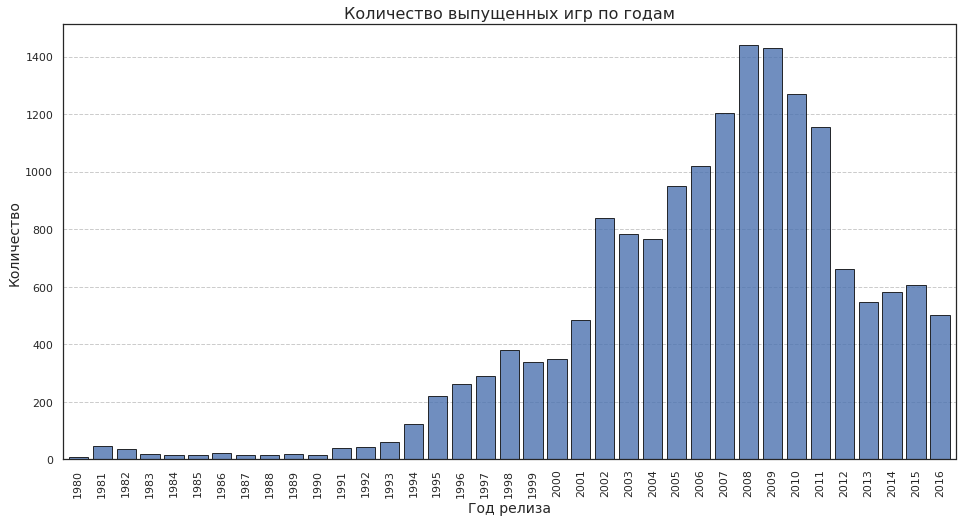

In [47]:
bar_graph(
    df_games.groupby('year_of_release')['year_of_release'].count().reset_index(name='count'),  
    title='Количество выпущенных игр по годам')

<a id="analis_data11"></a>
#### Вывод

Ознакомившись с историей развития график становится более понятен. С 1980 по 1990 года больше знаменуется развитием персональных компьютеров. В 1981 году впервые миру предвставлен IBM PC, а в 1984 году Apple впервые представляет миру Macintosh. Кроме всего этого в это десятилетие появилось множество несложных, домашних компьютеров вроде Commodore 64. С появлением персональных коспьютеров, сразу же стали образовываться компании, которые были ориентированы исключительно на персональные компьютеры (Broderbund, BudgeCo, Electronic Arts и другие). Все это способствовало бурному развитию именно персонаньных коспьютеров. В 1987 году появляется видеоадаптер VGA и почти сразу же SVGA. И начиная с 1991 рынок компьютерных игр начинает расти взрывными темпами вплоть до 2009 года. Дальше мир накрыл финансовый кризис, и как следствие, пользователи стали экономить на развлечениях. Параллельно с этим идет развитие социальных сетей, игр на он-лайн платформах, безумное подорожание видеоракт, которые активно стали использоваться в майнинге криптовалют. Все это не способствовало развитию компьютерных игр. И после серьезного падения рынка в 2012 году, на момент 2015 наблюдается стабилизация рынка

<a id="analis_data2"></a>
### Анализ продаж по платформам

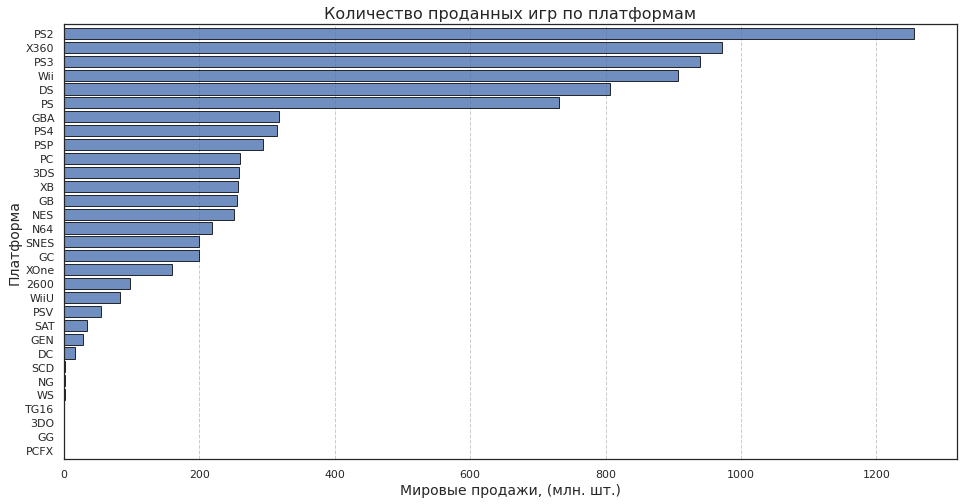

In [48]:
# посмротрим на график всех продаж по платформам
bar_graph(
    df_games.groupby('platform')['all_sales'].sum().reset_index().sort_values('all_sales'), 
    title='Количество проданных игр по платформам', kind='barh')

Из графика видно, что по суммарному количеству продаж выделяются 6 платформ. Это платформы PS2, X360, PS3, Wii, DS, PS. Посмотрим на продажи этих платформ по годам

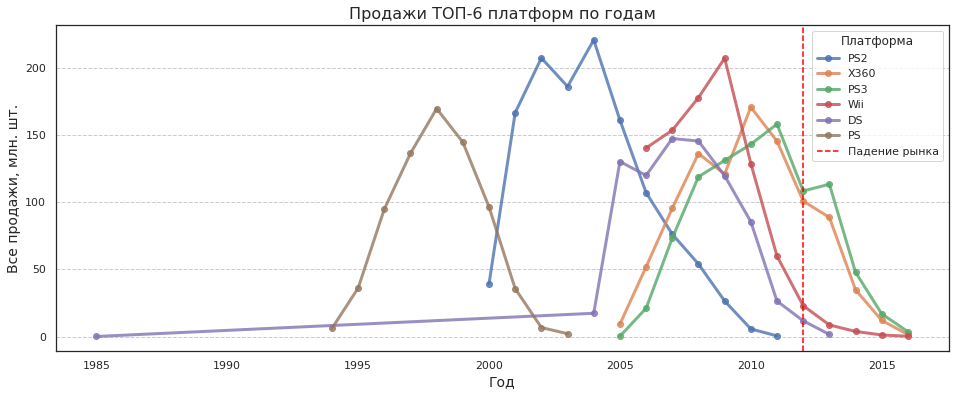

In [49]:
# посмотрим на продажи по годам ТОП-6 платформ
bar_graph_pltf(
    df_games.groupby('platform')['all_sales'].sum().reset_index()
    .sort_values('all_sales', ascending=False)[:6]['platform'].tolist(),
    col_gr='platform',
    title='Продажи ТОП-6 платформ по годам'
)

И вот, неожиданно, нашли странные данные по платформе DS в виде проброса даные от 1985 года до 2004. Выведем на экран данные по продажам с сортировкой по возрастанию года релиза игр.

In [50]:
# выведем данные по платформе
df_games.loc[df_games['platform'] == 'DS'].sort_values('year_of_release').head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales,platform_types
15957,Strongest Tokyo University Shogi DS,DS,1985,Action,0.00,0.00,0.02,0.00,<NA>,NaN,NaN,0.02,portable
14161,Puyo Pop Fever(us sales),DS,2004,Puzzle,0.03,0.00,0.00,0.00,<NA>,NaN,NaN,0.03,portable
6578,Madden NFL 2005,DS,2004,Sports,0.24,0.00,0.00,0.02,68,7.70,E,0.26,portable
6164,The Urbz: Sims In the City (US weekly sales),DS,2004,Simulation,0.26,0.00,0.00,0.02,<NA>,NaN,NaN,0.28,portable
8465,Zoo Keeper,DS,2004,Puzzle,0.10,0.01,0.05,0.01,74,7.50,E,0.17,portable


Strongest Tokyo University Shogi DS - это игра Сёги, также известная как японские шахматы, которая многократно перевыпускалась на разные платформы с 1983 года и по сей день. На платформе DS (Nintendo DS) она выпускалась в 2005 году. Исправим эту ошибку.

In [51]:
# в строке с игрой Strongest Tokyo University Shogi DS заменим 1985 год на 2005
df_games.loc[df_games['name'] == 'Strongest Tokyo University Shogi DS', 'year_of_release'] = 2005

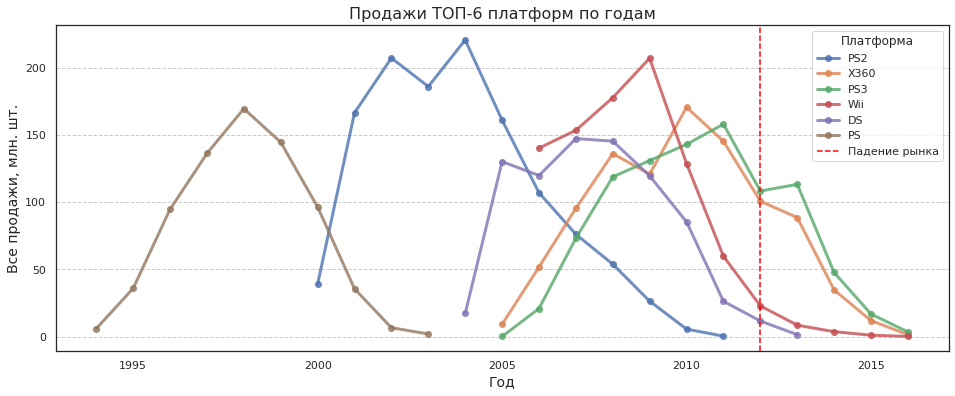

In [52]:
# посмотрим еще раз на продажи по годам ТОП-6 платформ
bar_graph_pltf(
    df_games.groupby('platform')['all_sales'].sum().reset_index()
    .sort_values('all_sales', ascending=False)[:6]['platform'].tolist(),
    col_gr='platform',
    title='Продажи ТОП-6 платформ по годам'
)

Создадим датафрейм с группировкой по платформам и сгенерируем данные с периодом жизни платформы и общим количеством продаж

In [53]:
# сформируем датафрейм и отсортируем его по общим продажам в порядке убывания
df_yrs_pltf = (df_games.groupby('platform').agg(
                                 min_year=('year_of_release', 'min'), 
                                 max_year=('year_of_release', 'max'),               
                                 val_sales=('all_sales', 'sum'))
               .assign(yers_life=lambda x: x['max_year'] - x['min_year'])
               .sort_values('max_year').reset_index())
df_yrs_pltf

,platform,min_year,max_year,val_sales,yers_life
0,2600,1980,1989,96.98,9
1,GG,1992,1992,0.04,0
2,SCD,1993,1994,1.86,1
3,GEN,1990,1994,28.35,4
4,NES,1983,1994,251.05,11
5,3DO,1994,1995,0.10,1
6,TG16,1995,1995,0.16,0
7,PCFX,1996,1996,0.03,0
8,NG,1993,1996,1.44,3
9,SNES,1990,1999,200.04,9


In [54]:
# посмотрим на первые 10 платформ - лидеров по мировым продажам игр и годы их активности
df_yrs_pltf.sort_values('val_sales', ascending=False)

,platform,min_year,max_year,val_sales,yers_life
19,PS2,2000,2011,1255.77,11
29,X360,2005,2016,971.42,11
22,PS3,2005,2016,939.64,11
27,Wii,2006,2016,907.51,10
20,DS,2004,2013,806.12,9
13,PS,1994,2003,730.86,9
16,GBA,2000,2007,317.85,7
23,PS4,2013,2016,314.14,3
21,PSP,2004,2015,294.05,11
25,PC,1985,2016,259.52,31


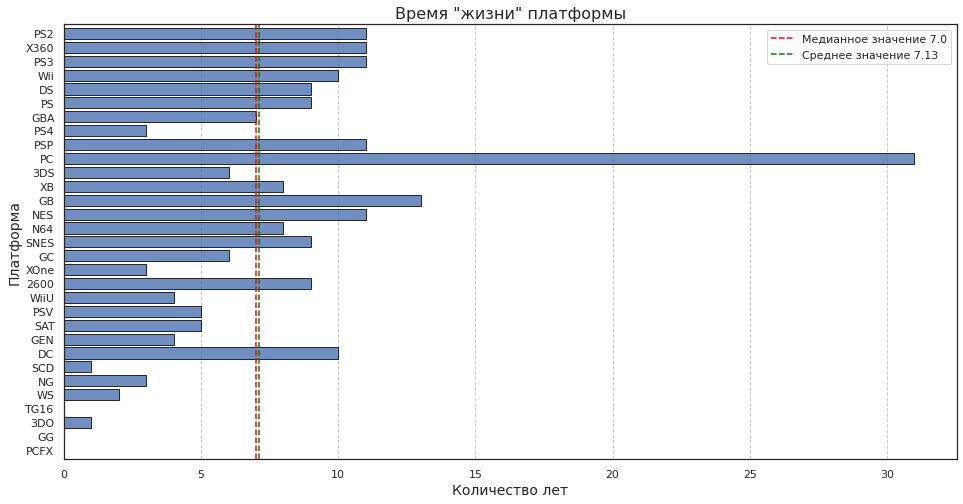

In [55]:
bar_graph(df_yrs_pltf.sort_values('val_sales'), col=[0, 4], title='Время "жизни" платформы', kind='barh', med=True)

Теперь посмотрим на распределение всех продаж по типу игоровых платформ

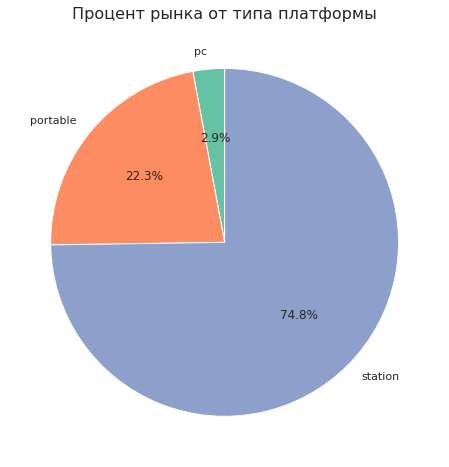

In [56]:
pie_graph(
    df_games.groupby('platform_types')['all_sales'].sum().reset_index().sort_values('all_sales'), 
    title='Процент рынка от типа платформы')

Посмотрим на распределение продаж по типу платформ по годам

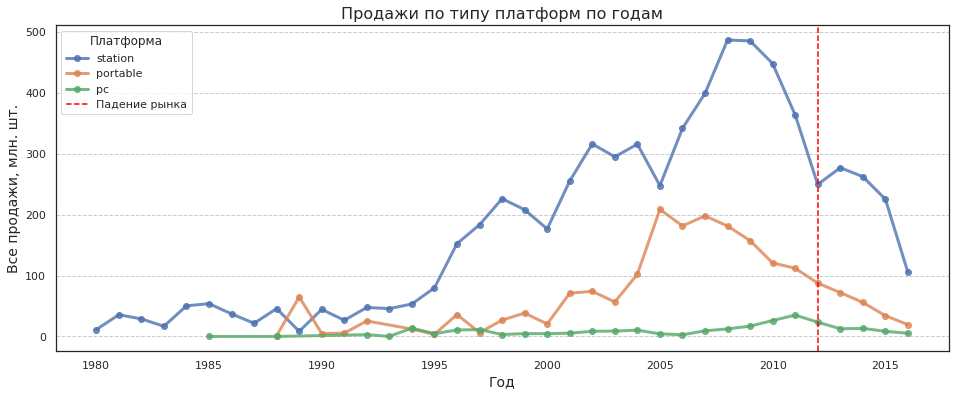

In [57]:
# посмотрим еще раз на продажи по годам ТОП-6 платформ
bar_graph_pltf(
    df_games.groupby('platform_types')['all_sales'].sum().reset_index()
    .sort_values('all_sales', ascending=False)['platform_types'].tolist(),
    col_gr='platform_types',
    title='Продажи по типу платформ по годам'
)

<a id="analis_data21"></a>
#### Вывод

Из графиков и таблиц мы видим, что среднее время "жизни" платформ составляет 7.13 лет при этом, оно правтически совпадает с медианным значением (7.0). При этом видно, что чем успешнее платформа, тем дольше её время жизни.

Смотря на графики продаж ТОП-6 с распределением по годам, то можно заметить, что все они выходят на свой пик продаж на 4-5 год после начала выпуска игр на них. Затем, в течение 5 лет идет спад.

Львиную долю рынка по типу платформ занимают стационарные игровые платформы. Доля продаж игр под них составиила 74.8%. На графике распределения по годам видно, что стационарные игровые платформы прочто завоевали рынок. Начиная с 2005 года доля игр под них неуклонно росла и во вмногом определяла направление рынка, в то время как начиная с 2005 года количество проданных игр на портативные платформы начало неуклонно сокращаться, и одна из возможных причин, это бурное развитие мобильных устройств, которые по сути, заменили портативные игровые платформы. А вот количество игр на персональные компьютеры начало расти с 2006 года. Во многом это объясняется тем, что многие игры, которые выпускались под игровые платформы, так же выпускались и на персональные компьютеры.

Сейчас, оценив график продаж игр по годам с оглядкой на график продаж по типу платформ, можно сказать, что падение в 2012 году продаж, это падение продаж стационарных игровых платформ. Рынок портативных платформ в кризисе с 2005 года, а доля игр на персональные компьютеры слишком мала, чтобы существенно влиять на рынок.


<a id="analis_data3"></a>
### Определеие актуального периода для построения прогноза продаж

Учитывая выше проведенные исследования можно сделать вывод что актуальные данные, которые нам необходимы для построения прогноза на 2017 год, необходимо и достаточног взять средний срок жизни платформ. В нашем случае это 7 лет. Учитывая, что данные за 2016 год могут быть не полными, сделаем на это поправку и возьмем 8 лет. Паттерн поведения успешной игровой платформы мы определии, я думаю что 8 лет, это более чем достаточный срок, для прогнозирования продаж на 2017 год.

Создадим датафрейм со срезом данных

In [58]:
# создадим датафрейм со срезом даннных
#df_games_ov2016 = df_games.loc[df_games['year_of_release'] > 2008]
df_games_ov2016 = df_games.loc[df_games['year_of_release'] > 2011]      #UPD
# выведем на экран первые 5 строк
df_games_ov2016.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales,platform_types
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97,8.20,M,21.05,station
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97,8.10,M,16.27,station
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,<NA>,NaN,NaN,14.63,station
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,<NA>,NaN,NaN,14.60,portable
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83,5.30,M,13.79,station



<a id="analis_data4"></a>
### Анализ актуального периода данных

Посмотрим на продажи по годам и их распределение по типу платформ. Для удобства и во избежании "перегруженности" графиков, выведем их по разным типам платформ

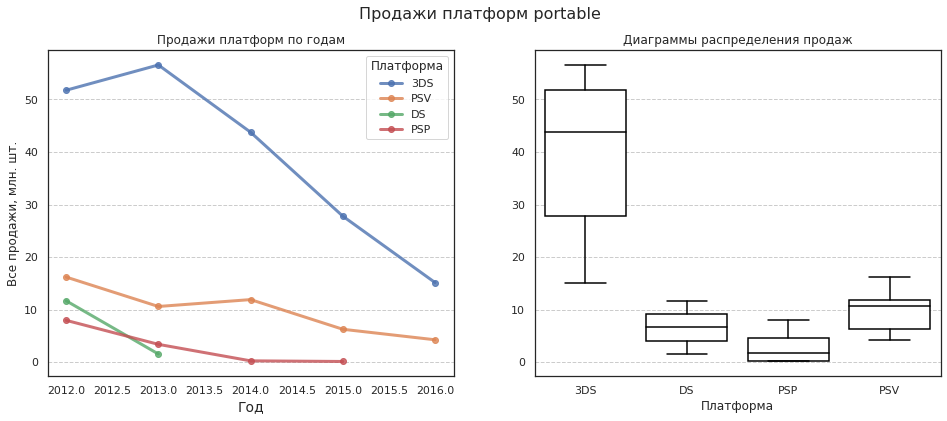

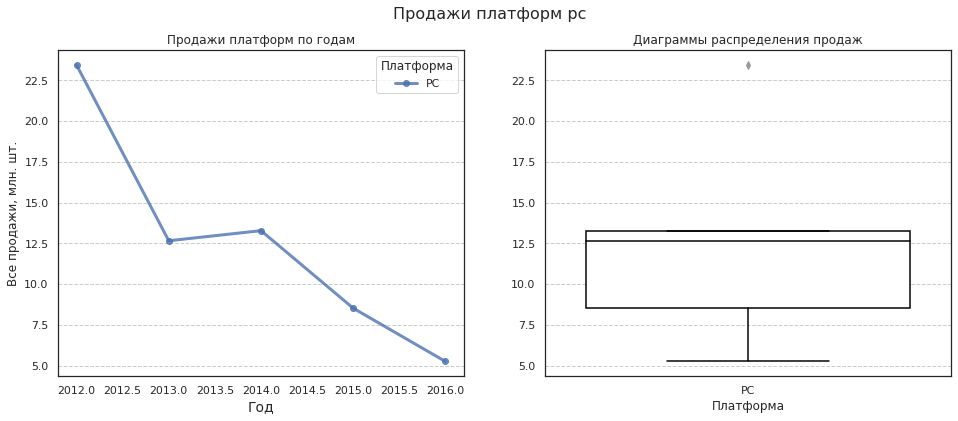

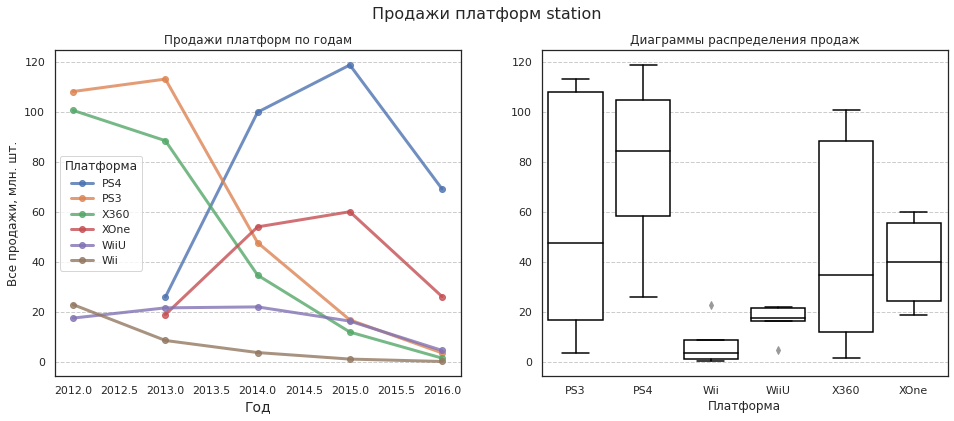

In [59]:
# выведем графики
for item in ['portable', 'pc', 'station']:
    bar_box_graph_pltf(
        df_games_ov2016.loc[df_games_ov2016['platform_types'] == item].groupby('platform')['all_sales'].sum().reset_index()
        .sort_values('all_sales', ascending=False)['platform'].tolist(),
        col_gr='platform',
        actual=True,
        item=item,
        axline=False
    )

Выведем статистические показатели столбца all_sales датафрейма df_games_ov2016 с разбивкой по типу платформы

In [60]:
# выведем таблицу
df_types_desc = df_games_ov2016['all_sales'].describe(percentiles=[0.05, 0.25, 0.5, 0.75, 0.95]).reset_index()
for item in ['portable', 'pc', 'station']:
    df_descr = df_games_ov2016.loc[df_games_ov2016['platform_types'] == item, 'all_sales'].describe(percentiles=[0.05, 0.25, 0.5, 0.75, 0.95]).reset_index()
    df_types_desc = df_types_desc.merge(df_descr, on='index')
df_types_desc.columns = ['index', 'sales_all', 'sales_portable', 'sales_pc', 'sales_station']
display(df_types_desc)

,index,sales_all,sales_portable,sales_pc,sales_station
0,count,2897.00,1015.00,254.00,1628.00
1,mean,0.50,0.27,0.25,0.69
2,std,1.25,0.93,0.49,1.45
3,min,0.01,0.01,0.01,0.01
4,5%,0.01,0.01,0.01,0.01
5,25%,0.04,0.03,0.03,0.06
6,50%,0.12,0.07,0.08,0.23
7,75%,0.43,0.18,0.24,0.69
8,95%,2.08,0.90,0.96,2.92
9,max,21.05,14.60,5.14,21.05


Как видно из таблицы 50% продаж игр по всем платформам не превышает 150 тыс. копий, и 95% всех игр продаются в количестве копий, меньшем чем 2.1 млн. Построим диаграммы распределения продаж игр по платформам со срезом до 2.2 млн. копий и со всеми выбросами. Заодно, для удобства востприятия, расскарим "ящики" в разные цвета по типу платформы

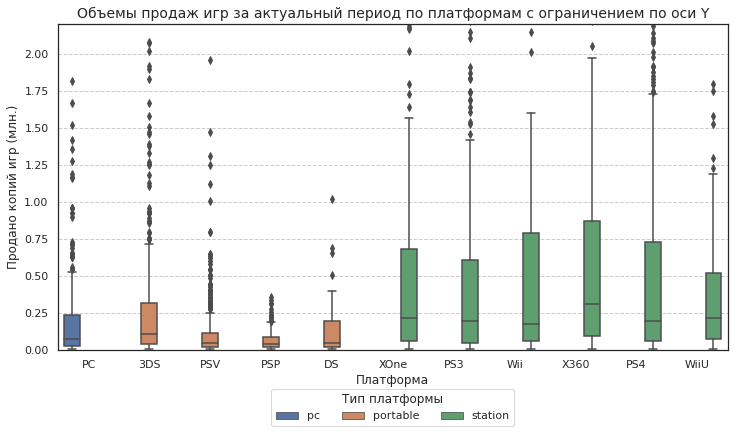

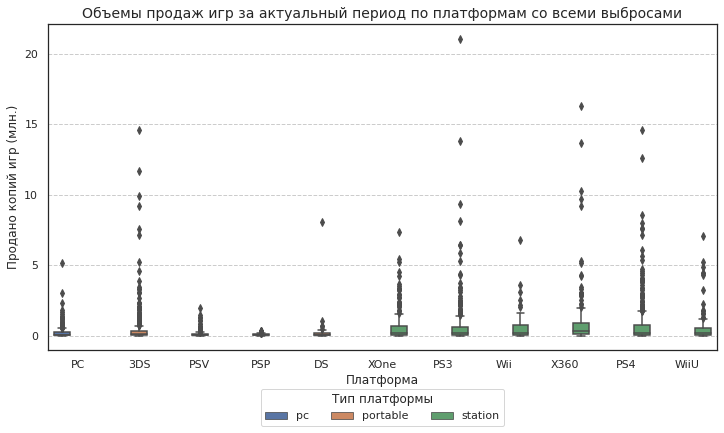

In [61]:
'''
fig, ax = plt.subplots(figsize=(16, 8))    
sns.boxplot(
    x='platform', 
    y='all_sales', 
    data=df_games_ov2016.loc[df_games_ov2016['all_sales'] < 1.9].sort_values('platform_types'), 
    orient='v', 
    hue='platform_types'
)
plt.legend(title='Тип платформы', loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=3)
plt.title('Объемы продаж игр за актуальный период по платформам', fontsize=14)
plt.xlabel('Платформа')
plt.ylabel('Продано копий игр (млн.)')
ax.yaxis.grid(True, linestyle='--')
ax.xaxis.grid(False)
'''
for lim in [2.2, None]:
    fig, ax = plt.subplots(figsize=(12, 6))    
    sns.boxplot(
        x='platform', 
        y='all_sales', 
        data=df_games_ov2016.sort_values('platform_types'), 
        orient='v', 
        hue='platform_types'
    )
    plt.legend(title='Тип платформы', loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=3)
    if lim is not None:
        ax.set_ylim(0, lim)
        plt.title('Объемы продаж игр за актуальный период по платформам с ограничением по оси Y', fontsize=14)
    else:
        plt.title('Объемы продаж игр за актуальный период по платформам со всеми выбросами', fontsize=14)
    plt.xlabel('Платформа')
    plt.ylabel('Продано копий игр (млн.)')
    ax.yaxis.grid(True, linestyle='--')
    ax.xaxis.grid(False)

<a id="analis_data41"></a>
#### Вывод

Изучив графики продаж и диагарммы рассеивания за интересующий нас период времени можно с определенной уверенностью утверждать, что **портативные платформы**, по крайней мере на данный момент времени, не имеют какого-то потенциала в развитии и увеличении объемов продаж на 2017 год. Данные за 2016 год не полные, но и без них видно устойчивое и планомерное снижение объемов продаж по всем платформам данной категории. И дело не только в том, что сам рынок портативных платформ переживает кризис еще с 2007 года, дело еще и в возрасте платформ. На рынке нет молодых моделей портативных устройств. Самая "молодая" кприставка, это PlayStation Portable (PSV), и ей уже 6 лет. Мы знаем, что средняя жизнь платформ составляет порядка 7 лет, то нет никакого смысла обращать внимание на рынок портативных платформ как минимум, до появления каких-то новых платформ. Что же касается рынка игр на **персональные компьютеры**, то здесь все во многом определяется состоянием рынка стационарных платформ. Что же касается рынка **стационарных платформ**, то здесь стоит обратить вниимание на две платформы. Первая платформа, это **PS4 семейства PlayStation от Sony**. Платформе меньше 3 лет, она в первые два года она показала отличный рост. В 2016 году есть спад, но во-первых, данные за 2016 год приведены не полносью, во-вторых после резкого изменения каких-либо значений (цены, количества продаж и т.д.) всегда идет небольшой откат назад. И вторая платформа, это **XOne семейства Xbox от Microsoft**. Эта платформа так же как и PS4, появилась на рынке а 2013 году и так же в течении двух лет показала хороший рост продаж. За 2016 год так же наблюдается спад. В целом, если посмотреть на рынок стационарных платформ, то по сути, мы имеем дело лишь с тремя платформами и производителями. PS2, PS3 и PS4, это разные поколения одной и той же линейки PlayStation от Sony. X360 и XOne, это линейка Xbox от Microsoft. По платформам Wii и WiiU линейки Nintendo от одноименной компании что-то сказать сложно. И Wii и WiiU провалились на рынке. Если Wii еще в 2006-2008 годах показала рост, то потом быль сильный спад, выход же более современной платформы WiiU в 2012 году не смог спасти положение. И как результат, обе платформы имеют крайне низкие продажи.

Что же касается продаж игр по платформам, то по таблице и диаграммам рассеивания продаж по количеству копий игр, виден очень большой разброс данных. На всех типах платформ мы видим, что стандартное отклонение в 2-3 раза превышает средние значения. А разница между медианным и первым квартилем в 3-4 раза меньше разницы между третьим и медианных квартилями. Все это указывает о сильной ассиметрии данных в сторону более высоких значений.


<a id="analis_data5"></a>
### Анализ влияния отзывов на продажи внутри популярной и других платформ

Изучим ситуацию, как влияют отзывы пользователей и критиков на продажи двух популярных платформ XOne и PS4

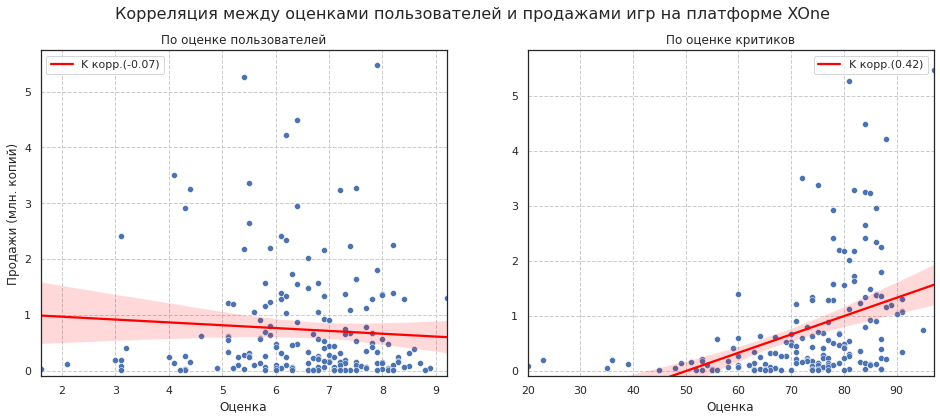

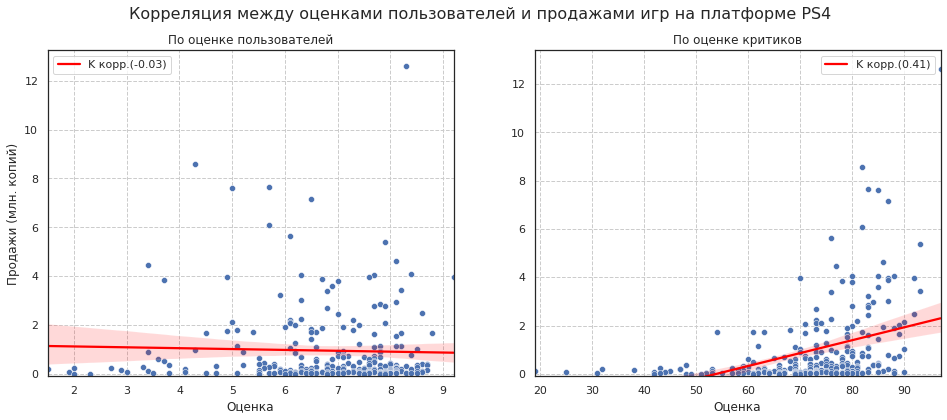

In [62]:
# построим графики рассеивания с расчетом коэффициента корреляции    
for item in ['XOne', 'PS4']:
    df_cor = df_games_ov2016.loc[(df_games_ov2016['platform'] == item)]
    scatterplot_graph(df_cor, item)

Как видно из графиков, корреляция между оценками пользователей и количеством продаж копий отсутствует. Корреляция же между оценками критиков и количеством продаж заметно выше, но все равно нельзя говорить о какой-то сильной зависимости. Самый сильный коэффициент корреляции наблюдается между оценками критиков и количеством продаж, и равен 0.43. Можно сказать, что есть слабая зависимость.

Выведем значения коэффициентов корреляции ко всем платформам, представленным за интересующий нас период 

In [63]:
# выведем значения коэффициентов корреляции ко всем платформам
dict_corr = {}
for item in df_games_ov2016['platform'].unique():
    df_cor = df_games_ov2016.loc[(df_games_ov2016['platform'] == item)]
    df_cor['critic_score'] = df_cor['critic_score'].astype('float64')
    list_cr = []
    for cr in ['user_score', 'critic_score']:
        list_cr.append(df_cor[cr].corr(df_cor['all_sales']).round(2))
    dict_corr[item] = list_cr
        
display(
    pd.DataFrame.from_dict(dict_corr, orient='index', columns=['corr_user', 'corr_critic'])
    .reset_index()
    .rename(columns={'index': 'platform'})
        )

,platform,corr_user,corr_critic
0,PS3,-0.01,0.33
1,X360,0.01,0.36
2,PS4,-0.03,0.41
3,3DS,0.20,0.32
4,DS,0.88,1.00
5,XOne,-0.07,0.42
6,WiiU,0.40,0.35
7,Wii,0.28,-0.41
8,PC,-0.12,0.24
9,PSV,-0.00,0.09


Для полноты картины построим диаграммы рассеивания еще для несколиких платформ

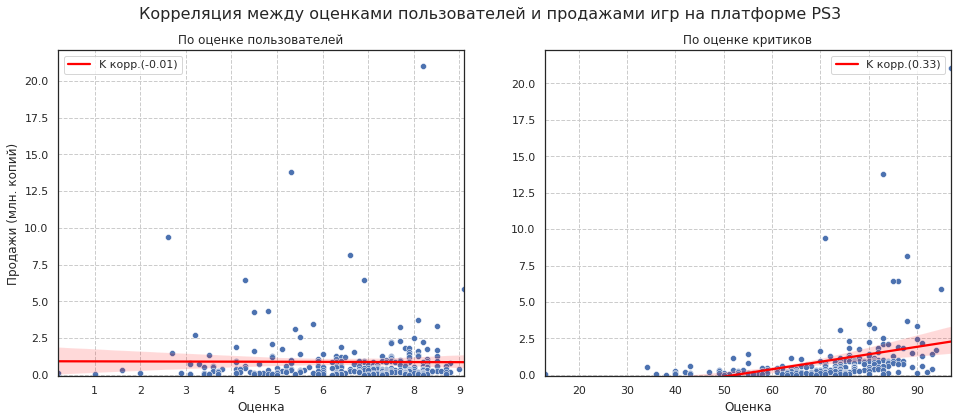

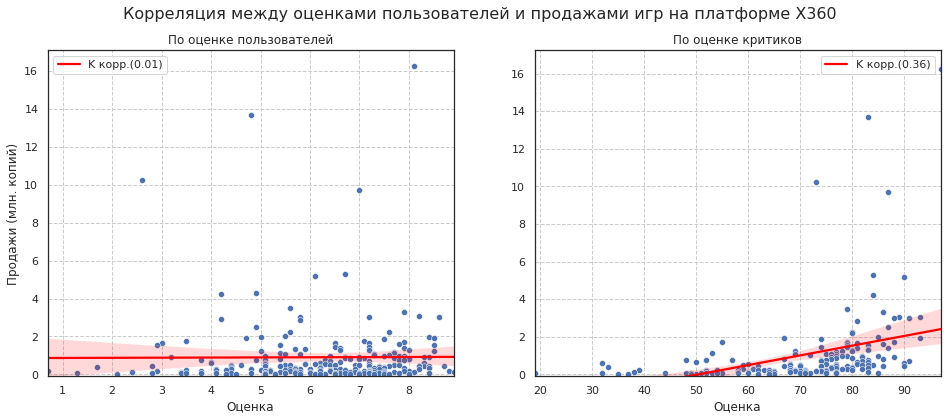

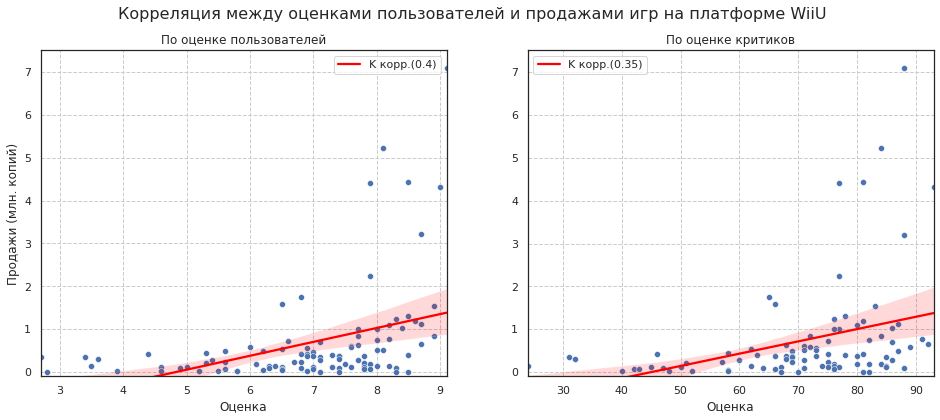

In [64]:
# построим графики рассеивания с расчетом коэффициента корреляции    
for item in ['PS3', 'X360', 'WiiU']:
    df_cor = df_games_ov2016.loc[(df_games_ov2016['platform'] == item)]
    scatterplot_graph(df_cor, item)

<a id="analis_data51"></a>
#### Вывод

Проанализировав зависимость продаж от оценок пользователей и критиков можно сделать вывод, что о общем оценки критиков сильнее влияют на продажи игр чем оценки пользователей. Вероятнее всего, это объясняется тем, что критики знакомятся с игрой и ставят свои оценки еще на старте продаж, в то время как рейтинг пользователей имеет накопительный эффект и принимает значимость по мере увеличения продаж. Но и зависимость продаж от оценки критиков никак нельзя назвать сильной. Максимальный коэффициент корреляции равен 0.43, это значит что зависимость слабая, умеренная. Каких-то существенных отличий коэффициентов корреляции внутри двух популярных платформ от остальных, не наблюдается.


<a id="analis_data6"></a>
### Анализ распределения игр по жанрам

Посмотрим на количество всего проданных игр по жанрам за интересующий нас период

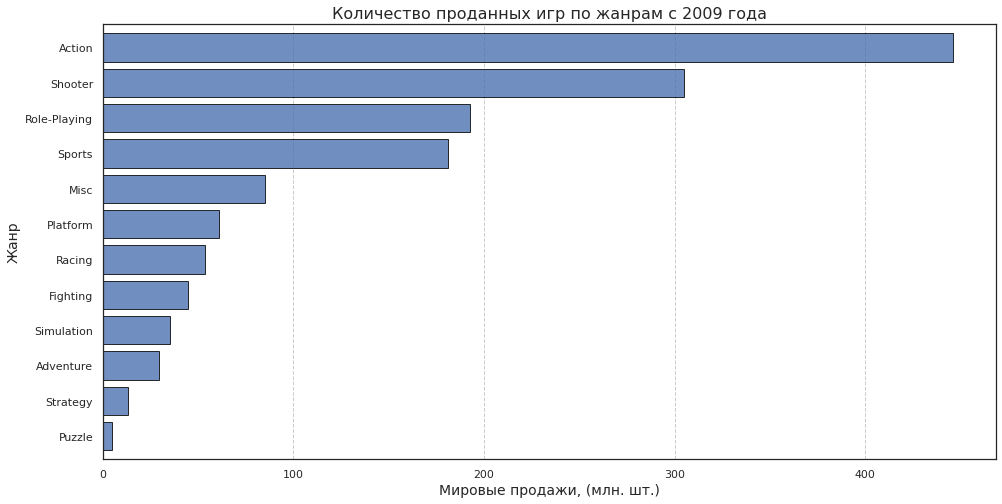

In [65]:
# выведем график
bar_graph(
    df_games_ov2016.groupby('genre')['all_sales'].sum().reset_index().sort_values('all_sales'), 
    title='Количество проданных игр по жанрам с 2009 года', kind='barh')

Посмотрим на тенденцию продаж ТОП-5 жанров игр по годам. Выведем первые 5 самых популярных жанров по сумарному количеству продаж

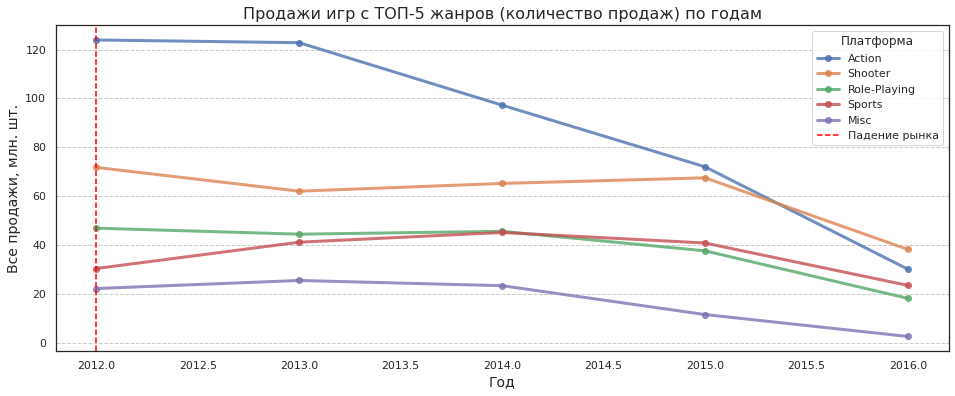

In [66]:
bar_graph_pltf(
    df_games_ov2016.groupby('genre')['all_sales'].sum().reset_index()
    .sort_values('all_sales', ascending=False)[:5]['genre'].tolist(),
    col_gr='genre',
    title='Продажи игр с ТОП-5 жанров (количество продаж) по годам',
    actual=True
)

Теперь посмотрим на распределение мест жанров игр в зависимости от медианного значения продаж. Этот фактор достаточно важен. Он показывает общую заинтересованность, популярность пользователей в том или ином жанре игр.

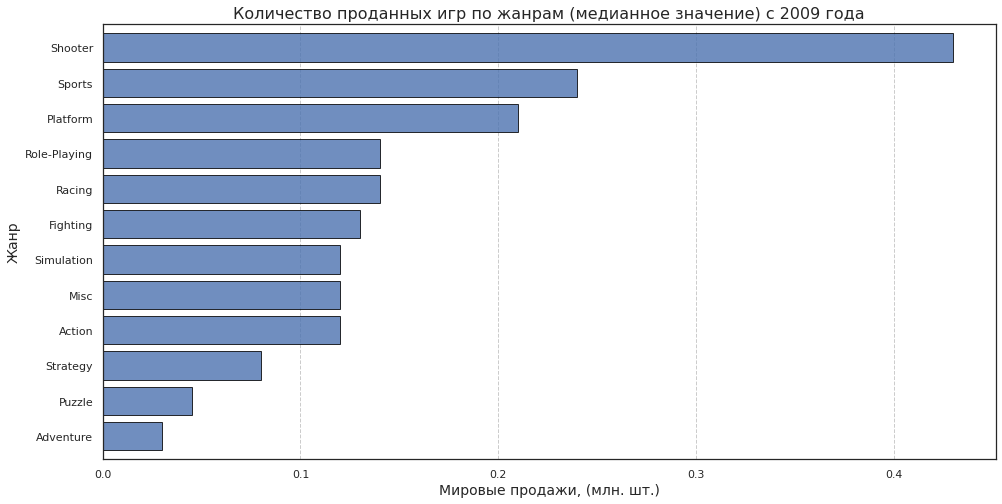

In [67]:
# выведем график
bar_graph(
    df_games_ov2016.groupby('genre')['all_sales'].median().reset_index().sort_values('all_sales'), 
    title='Количество проданных игр по жанрам (медианное значение) с 2009 года', kind='barh')

Теперь выведем первые 5 самых популярных жанров по медианному значению количества продаж

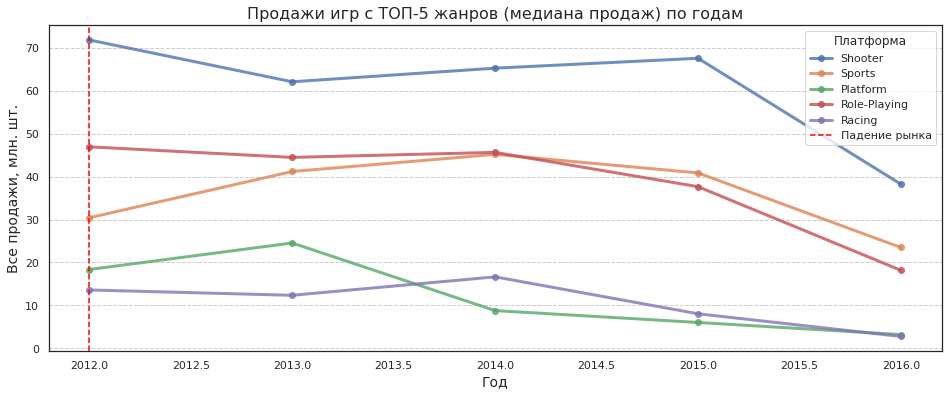

In [68]:
bar_graph_pltf(
    df_games_ov2016.groupby('genre')['all_sales'].median().reset_index()
    .sort_values('all_sales', ascending=False)[:5]['genre'].tolist(),
    col_gr='genre',
    title='Продажи игр с ТОП-5 жанров (медиана продаж) по годам',
    actual=True
)

In [95]:
# выведем таблицу
name_columns = ['index', 'all']
df_types_desc = df_games_ov2016['all_sales'].describe(percentiles=[0.05, 0.25, 0.5, 0.75, 0.95]).reset_index()
for item in df_games_ov2016['genre'].unique():
    name_columns.append(item)
    df_descr = df_games_ov2016.loc[df_games_ov2016['genre'] == item, 'all_sales'].describe(percentiles=[0.05, 0.25, 0.5, 0.75, 0.95]).reset_index()    
    df_types_desc = df_types_desc.merge(df_descr, on='index')    
    
df_types_desc.columns = name_columns
df_types_desc = df_types_desc.T
df_types_desc.columns = df_types_desc.iloc[0]
df_types_desc = df_types_desc.iloc[2:]
#df_types_desc['def_m1'] = df_types_desc['50%'] - df_types_desc['25%']  # разница между медианным и первым кравтилем
#df_types_desc['def_m3'] = df_types_desc['75%'] - df_types_desc['50%']  # разница между третьим кравтилем и медианным
display(df_types_desc.sort_values('50%', ascending=False))


index,count,mean,std,min,5%,25%,50%,75%,95%,max
Shooter,237.00,1.29,2.25,0.01,0.02,0.13,0.43,1.47,4.64,14.63
Sports,267.00,0.68,1.14,0.01,0.01,0.08,0.24,0.74,2.68,8.58
Platform,85.00,0.72,1.36,0.01,0.02,0.09,0.21,0.66,2.21,9.90
Role-Playing,370.00,0.52,1.32,0.01,0.02,0.06,0.14,0.41,1.87,14.60
Racing,115.00,0.47,0.89,0.01,0.01,0.05,0.14,0.42,2.01,7.09
Fighting,109.00,0.41,0.91,0.01,0.02,0.06,0.13,0.36,1.17,7.55
Action,1040.00,0.43,1.16,0.01,0.01,0.03,0.12,0.40,1.62,21.05
Misc,193.00,0.44,1.08,0.01,0.01,0.03,0.12,0.33,1.94,9.18
Simulation,80.00,0.44,1.24,0.01,0.01,0.03,0.12,0.33,1.50,9.17
Strategy,71.00,0.19,0.27,0.01,0.01,0.03,0.08,0.25,0.67,1.67


In [88]:
agg_func = {'all_sales': ['describe']}
df_describe = df_games_ov2016.groupby(['genre']).agg(agg_func).reset_index().set_index('genre')

,all_sales,all_sales,all_sales,all_sales,all_sales,all_sales,all_sales,all_sales
genre,,,,,,,,
Action,1040.00,0.43,1.16,0.01,0.03,0.12,0.40,21.05
Adventure,302.00,0.10,0.21,0.01,0.02,0.03,0.08,1.66
Fighting,109.00,0.41,0.91,0.01,0.06,0.13,0.36,7.55
Misc,193.00,0.44,1.08,0.01,0.03,0.12,0.33,9.18
Platform,85.00,0.72,1.36,0.01,0.09,0.21,0.66,9.90
Puzzle,28.00,0.17,0.31,0.01,0.02,0.04,0.10,1.19
Racing,115.00,0.47,0.89,0.01,0.05,0.14,0.42,7.09
Role-Playing,370.00,0.52,1.32,0.01,0.06,0.14,0.41,14.60
Shooter,237.00,1.29,2.25,0.01,0.13,0.43,1.47,14.63


In [92]:
# Определяем функцию, которая будет возвращать описание с нужными процентилями
def custom_describe(series):
    return series.describe(percentiles=[0.05, 0.25, 0.5, 0.75, 0.95])

# Используем groupby и apply с новой функцией
df_describe = df_games_ov2016.groupby(['genre'])['all_sales'].apply(custom_describe).unstack().reset_index().set_index('genre')
df_describe. reset_index()

,genre,count,mean,std,min,5%,25%,50%,75%,95%,max
0,Action,1040.00,0.43,1.16,0.01,0.01,0.03,0.12,0.40,1.62,21.05
1,Adventure,302.00,0.10,0.21,0.01,0.01,0.02,0.03,0.08,0.41,1.66
2,Fighting,109.00,0.41,0.91,0.01,0.02,0.06,0.13,0.36,1.17,7.55
3,Misc,193.00,0.44,1.08,0.01,0.01,0.03,0.12,0.33,1.94,9.18
4,Platform,85.00,0.72,1.36,0.01,0.02,0.09,0.21,0.66,2.21,9.90
5,Puzzle,28.00,0.17,0.31,0.01,0.01,0.02,0.04,0.10,0.79,1.19
6,Racing,115.00,0.47,0.89,0.01,0.01,0.05,0.14,0.42,2.01,7.09
7,Role-Playing,370.00,0.52,1.32,0.01,0.02,0.06,0.14,0.41,1.87,14.60
8,Shooter,237.00,1.29,2.25,0.01,0.02,0.13,0.43,1.47,4.64,14.63
9,Simulation,80.00,0.44,1.24,0.01,0.01,0.03,0.12,0.33,1.50,9.17


Посмотрим на ТОП-5 игр с максимальным количеством продаж

In [70]:
df_games_ov2016.sort_values('all_sales', ascending=False).head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales,platform_types
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97,8.20,M,21.05,station
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97,8.10,M,16.27,station
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,<NA>,NaN,NaN,14.63,station
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,<NA>,NaN,NaN,14.60,portable
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83,5.30,M,13.79,station


<a id="analis_data61"></a>
#### Вывод

Если рассматривать популярность жанров в разрезе суммы проданных копий игр, то здесь несомненным лидером является Action. А ТОП-5 жанров игр выглядит следующим образом: Action, Shooter, Sports, Role-Playing, Misc. Однако, если смотреть на рынок игр в разрезе продаж медианых значений, здесь уже явным фаворитом является жанр Shooter, а ТОП-5 жанров игр выглядит уже по-другому: Shooter, Sports, Platform, Role-Playing, Racing. Что касается жанра Action, то он занимает лишь 7 место. При этом глядя на график распределения количества продаж по годам видно, что продажи жанра Action начали падать еще с 2013 года и в итоге, на декабрь 2016 года, устапили лидерство жанру Shooter. Если же смотреть на ТОП-5 игр и по суммарному количеству продаж, и по медианному значению, то в оба списка попадают три жанра. Это Shooter, Sports и Role-Playing. Что же касается жанра Action, то судя по графикам и таблице статистических данных, можно предположить, что этот жанр в основном получает большие продажи за счет появления хитов. 

Хочется еще обратить внимание на рейтинг жанров игр, и при этом, не имеет значение на какой. Обращает на себя тот фактор, что в ТОП-3 обоих рейтингов находятся игры развлекательного характера. В то время, как в нижней части рейтинга, последние три жанра с явным акцентом на интеллектуальные вызовы. Одним словом, еще раз напоминает о себе древний как мир, лозунг: Хлеба и зрелищ!(с).

В целом, нельзя сказать, что пользователи предпочитают какой-то определенный жанр. Пользователи предпочитают качественный продукт. Но с уклоном на развлекательный характер. На это косвенно указывают ТОП-5 игр с максимальным количеством продаж. В 5 играх представлены 3 жанра.

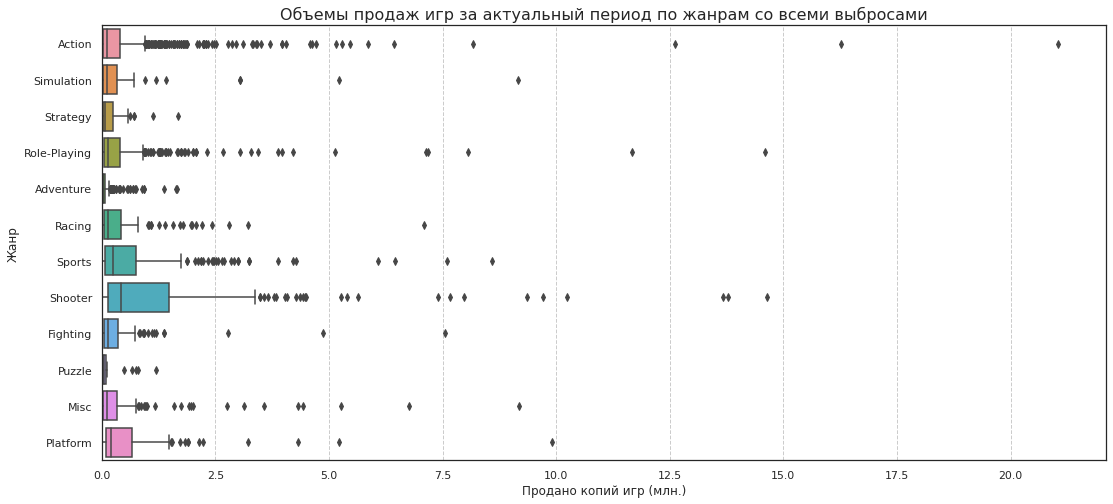

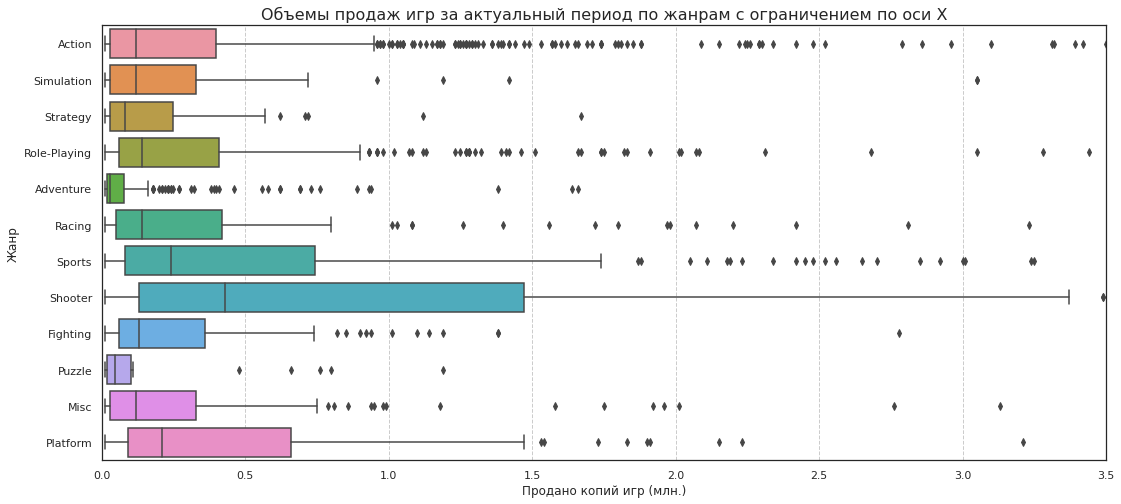

In [71]:
# построим диаграмму размаха продаж по жанрам
for lim in [None, 3.5]:
    fig, ax = plt.subplots(figsize=(18, 8))    
    sns.boxplot(
        x='all_sales', 
        y='genre', 
        data=df_games_ov2016.sort_values('platform_types'), 
        orient='h'
    )
    if lim is not None:
        ax.set_xlim(0, lim)
        plt.title('Объемы продаж игр за актуальный период по жанрам с ограничением по оси X', fontsize=16)
    else:        
        plt.title('Объемы продаж игр за актуальный период по жанрам со всеми выбросами', fontsize=16)
        ax.set_xlim(0)
    plt.xlabel('Продано копий игр (млн.)')
    plt.ylabel('Жанр')
    ax.xaxis.grid(True, linestyle='--')
    ax.yaxis.grid(False)

 Создается устойчивое ощущение, что именно выбросы делают выручку производителям игр. Если смотреть на медианы, то они у всех без исключения, сползают в сторону первых квартилей, при этом достаточно сильно. Глядя на эти графики можно сказать, что рынок видеоигр в принципе живет только за счет "выброосов", т.е. хитов, которые и обеспечивают прибыли). Самый симпатичный межквартильный размах несомненно у жанра Shooter. Далее идет жанр Sports, затем Platform. В принципе, картина повторяет график по медианам продаж, который я построил выше. С той лишь разницей, что эта диаграмма более информативно выглядит. И более эпично). Надо будет запомнить для себя, что, по возможности, лучше использовать именно такой способ визуализации, а не просто график с барами.



<a id="analis_data7"></a>
### Выводы по исследовательскому анализу данных

При проведении анализа данных мы выяснили, что рынок игр начал активно развиваться с 1990 года и развивался вплоть до 2010 года, а затем был спад и падение продаж в 2012 году. Мы узнали, что самой успешной игровой платформой на 2016 год является PS2 семейства PlayStation от Sony. А средняя жизнь игровых платформ в целом составляет порядка 7-9 лет и зависит от их успешности, а выходят на свой пик успешные платформы на третий-четвертый год после своего появления на рынке.  Узнали, что наиболее уверенно себя чувствует на рынке видеоигр только тип стационарных игровых платформ и является доминантом в нем (74.8% доля рынка).

Что же касается данных, необходимых нам для определения потенциально успешного продукта, то были определены две наиболее потенциальные игровые платформы. Это PS4 семейства PlayStation от Sony и XOne семейства Xbox от Microsoft. Так же было установлено, что при выборе потенциально популярного продукта стоит исключить жанры Adventure, Strategy, Puzzle и Simulation. Оптимально взять жанры Sports и Shooter. Так же стоит обращать внимание на мнение критиков, но только как один из дополнительных факторов принятия решения.

<a id="analis_user_data"></a>
## Анализ портрета пользователей регионов Северной Америки, Европы и Японии


<a id="analis_user_data1"></a>
### ТОП-5 самых популярных платформ пользователей анализируемых регионов

Выясним, какие платформы преобладают в интересующих нас регионах. Для этого выведем график и таблицу с данными

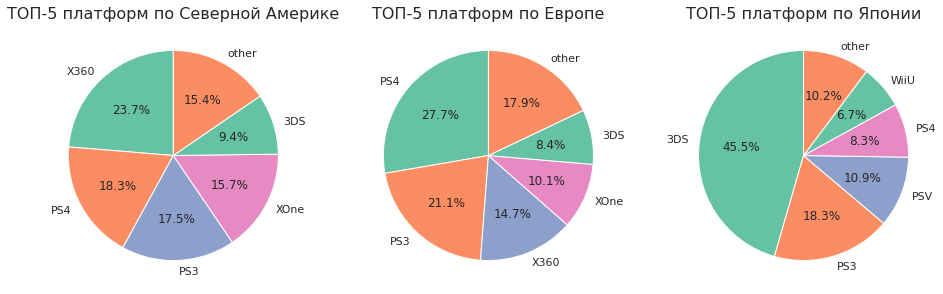

In [72]:
'''
dic_region_pltf = {
    'na_sales': 'ТОР-5 платформ в Северной Америке',
    'eu_sales': 'ТОР-5 платформ в Европе',
    'jp_sales': 'ТОР-5 платформ в Японии',
}
for item in ['na_sales', 'eu_sales', 'jp_sales']:
    df_reg_user = (df_games_ov2016.groupby('platform').
                 agg(sum_sale=(item, 'sum')).
                 reset_index().
                 assign(perc=lambda x: x['sum_sale'] / x['sum_sale'].sum() * 100).sort_values('perc', ascending=False)[:5])
    
    user_region_graph(df_reg_user, title=dic_region_pltf[item], ylable='Платформа')
    print(f'Таблица с данными по {dic_region_pltf[item]}:')
    display(df_reg_user.reset_index(drop=True))
''';
dic_region_pltf = {
    'na_sales': ['ТОП-5 платформ по Северной Америке'],
    'eu_sales': ['ТОП-5 платформ по Европе'],
    'jp_sales': ['ТОП-5 платформ по Японии']
}
for item in ['na_sales', 'eu_sales', 'jp_sales']:
    df_reg_user = (df_games_ov2016.groupby('platform').
                 agg(sum_sale=(item, 'sum')).
                 reset_index().sort_values('sum_sale', ascending=False))
    other_sum = df_reg_user.iloc[5:]['sum_sale'].sum()   
    drop_list = df_reg_user.iloc[5:]['platform'].tolist()
    df_reg_user = df_reg_user.loc[~df_reg_user['platform'].isin(drop_list)]
    df_reg_user.loc[len(df_reg_user)] = ['other', other_sum]
    dic_region_pltf[item].append(df_reg_user)              
pie_graph_regions(dic_region_pltf)

<a id="analis_user_data11"></a>
#### Вывод

Первое, на что хочется обратить внимание, это то, что на рынке Японии из ТОП-5 платформ 1,3 и 5 места занимают портативные платформы. Общая доля занимаемого ими рынка в Японии составляет чуть больше 62%. На рынке же Европы и Северной Америки в ТОП-5 попала только одна портативная платформа 3DS от Nintendo.

По производителям в ТОП-5 платформ Японии вошли исключительно японские производители, это Sony и Nintendo. На рынке Северной Америки максимальная доля рынка, благодаря двум платформам X360 и XOne, принадлежит компании Microsoft. На Европейском рынке наибольшей популярностью пользуется платформа PS4 от Sony.

В целом, все вполне закономерно и ожидаемо. Корпорация Microsoft представляет США и доминирует в своем регионе, в Северной Америке. Япония, это традиционно закрытая страна, живущая по своим правилам, со своим менталитетом, и пробиться на рынок её иностранному бизнесу в принципе достаточно сложно. Европа же, как примерный потребитель, пользуется всеми производителями игровых платформ.


<a id="analis_user_data2"></a>
### ТОП-5 самых популярных жанров видеоигр пользователей анализируемых регионов

Выясним, какие жанры видеоигр преобладают в интересующих нас регионах. Для этого выведем график и таблицу с данными

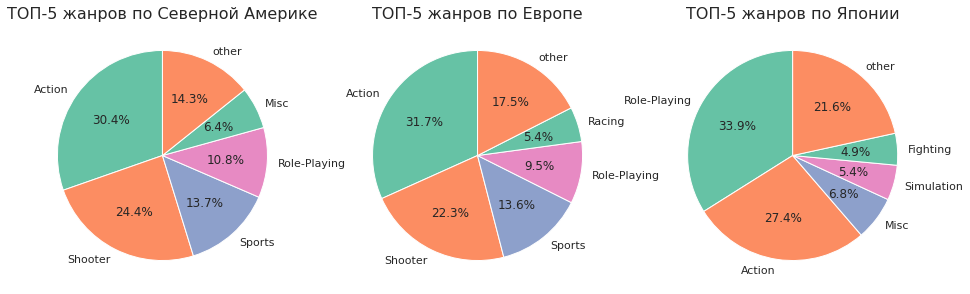

In [73]:
'''
dic_region_gnr = {
    'na_sales': 'ТОР-5 жанров в Северной Америке',
    'eu_sales': 'ТОР-5 жанров в Европе',
    'jp_sales': 'ТОР-5 жанров в Японии',
}
for item in ['na_sales', 'eu_sales', 'jp_sales']:
    df_reg_user = (df_games_ov2016.groupby('genre').
                 agg(sum_sale=(item, 'sum')).
                 reset_index().
                 assign(perc=lambda x: x['sum_sale'] / x['sum_sale'].sum() * 100).sort_values('perc', ascending=False)[:5])
    
    user_region_graph(df_reg_user, title=dic_region_gnr[item], ylable='Жанр')
    print(f'Таблица с данными по {dic_region_gnr[item]}:')
    display(df_reg_user.reset_index(drop=True))
''';

dic_region_gnr = {
    'na_sales': ['ТОП-5 жанров по Северной Америке'],
    'eu_sales': ['ТОП-5 жанров по Европе'],
    'jp_sales': ['ТОП-5 жанров по Японии']
}
for item in ['na_sales', 'eu_sales', 'jp_sales']:
    df_reg_user = (df_games_ov2016.groupby('genre').
                 agg(sum_sale=(item, 'sum')).
                 reset_index().sort_values('sum_sale', ascending=False))

    other_sum = df_reg_user.iloc[5:]['sum_sale'].sum()   
    drop_list = df_reg_user.iloc[5:]['genre'].tolist()
    df_reg_user = df_reg_user.loc[~df_reg_user['genre'].isin(drop_list)]
    df_reg_user.loc[len(df_reg_user)] = ['other', other_sum]
    dic_region_gnr[item].append(df_reg_user)          
    
pie_graph_regions(dic_region_gnr)

Как видно из данных, у пользователей из Европы и Северной Америки на первом месте расположилсяжанр Action, затем идет Shooter и на замыкает тройку лидеров жанр Sports. У пользователей из Японии все немного по другому. На первом месте у них расположился жанр Role-Playing, на втором Action и замыкает тройку жанр Misc. Обращает на себя внимание тот фактор, что у пользователей на вошел в ТОП-5 жанр Shooter, который очень популярен в Европе и Северной Америке. Скорее всего, отличия в предпочтениях жанров между пользователями из Японии от пользователей из Северной Америки и Европы, объясняются тем же, что и выбор платформ. Это отличие менталитета пользователей, и как следствие, другие предпочтения в жанрах.

<a id="analis_user_data21"></a>
#### Вывод


<a id="analis_user_data3"></a>
### Влияние рейтинга ESRB на продажи в отдельном регионе

Выясним, как рейтинг ESRB влияет на продажи в отдельном регионе. Для этого выведем график и таблицу с данными

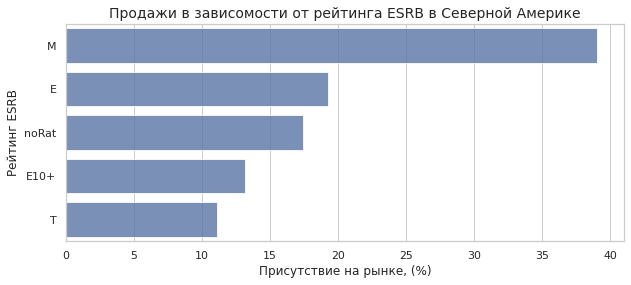

Таблица с данными по Продажи в зависомости от рейтинга ESRB в Северной Америке:


,rating,sum_sale,perc
0,M,231.61,39.04
1,E,114.37,19.28
2,noRat,103.31,17.41
3,E10+,77.93,13.14
4,T,66.02,11.13


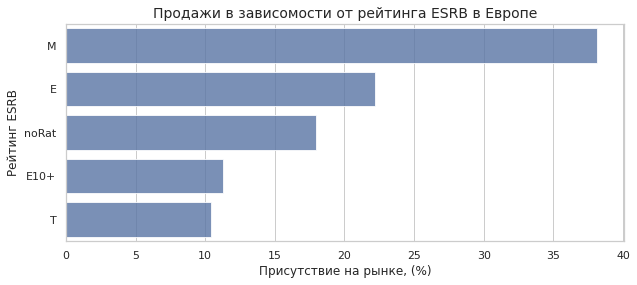

Таблица с данными по Продажи в зависомости от рейтинга ESRB в Европе:


,rating,sum_sale,perc
0,M,194.19,38.16
1,E,113.02,22.21
2,noRat,91.50,17.98
3,E10+,57.25,11.25
4,T,52.96,10.41


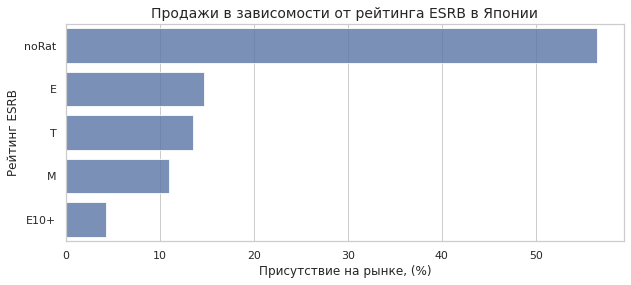

Таблица с данными по Продажи в зависомости от рейтинга ESRB в Японии:


,rating,sum_sale,perc
0,noRat,109.08,56.57
1,E,28.33,14.69
2,T,26.02,13.49
3,M,21.20,10.99
4,E10+,8.19,4.25


In [74]:
dic_region_esrb = {
    'na_sales': 'Продажи в зависомости от рейтинга ESRB в Северной Америке',
    'eu_sales': 'Продажи в зависомости от рейтинга ESRB в Европе',
    'jp_sales': 'Продажи в зависомости от рейтинга ESRB в Японии',
}
for item in ['na_sales', 'eu_sales', 'jp_sales']:
    df_reg_user = (df_games_ov2016.assign(rating=df_games_ov2016['rating'].fillna('noRat')).
                   groupby('rating').agg(sum_sale=(item, 'sum')).reset_index().
                   assign(perc=lambda x: x['sum_sale'] / x['sum_sale'].sum() * 100).sort_values('perc', ascending=False))
    df_reg_user['rating'] = df_reg_user['rating'].replace('', 'NoRat')
    user_region_graph(df_reg_user, title=dic_region_esrb[item], ylable='Рейтинг ESRB')
    print(f'Таблица с данными по {dic_region_esrb[item]}:')
    display(df_reg_user.reset_index(drop=True))

<a id="analis_user_data31"></a>
#### Вывод

По данных из таблиц и графиков можно сделать заключение, что пользователи из Европы и Северной Америки предпочитают игры с рейтингом М (для взрослых) и рейтингом Е(для всех). При этом, доля продаж игр в этими рейтингами в каждом из регионов превышает 57% от доли рынка. Поэтому можно сказать с определенной долей уверенности, что при покупке игр, пользователи из Европы и Северной Америки обращают внимание на рейтинг ESRB. 

Что же касается пользователей из Японии, то здесь все немного сложнее. На первом месте у них игры без рейтинга, с долей рынка в 56%. Но здесь важно оговориться, что в Японии, есть своя система возрастного рейтинга CERO, которая входит в CESA(японская организация, основанная в 1996 году с целью «продвижения индустрии компьютерных развлечений ... с целью содействия укреплению японской промышленности, а также дальнейшего обогащения образа жизни людей»). CERO не входит в IARC(международная коалиция возрастных рейтингов разных стран). Проще говоря, у многих игр на рынке Японии рейтинга ESRB просто нет. Производителю видеоигр для продажи своей продукции в Японии лучше получить рейтинг CERO.


<a id="analis_user_data4"></a>
### Общие выводы по анализу пользователей регионов Северной Америки, Европы и Японии

Проведя анализ пользователей из трех регионов, можно сделать основные выводы о том, что в целом пользователи из Северной Америки и Европы очень похожи. Схожие предпочтения в типах платформ, жанрах и возрастном рейтинге видеоигр. Что же касается пользователей из Японии, то особенности законов и менталитета пользователей, накладывают свои особенности. Так, например, в отличие от пользователей из Северной Америки и Европы, пользователи из Японии предпочитают портативные платформы, при этом исключительно от японских производителей. В отличие от европейских и североамериканских пользователей, пользователи из янонии не любят жанр Shooter(убей их всех), а вместо этого предпочитают более веселый и мирный жанр Platform.Так же мы выяснили, что в Японии большинство проданных игр не имеют возрастного рейтинга ESRB и наверняка это связано с тем, что в Японии существует свой возрастной рейтинг.

<a id="chack_hyp"></a>
## Проверка гипотез


<a id="chack_hyp1"></a>
### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Проверим гипотезу о том, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые. Для этого создадим основную гипотезу H0 и альтернативную, H1. Основная гипотеза будет отверждать, что рейтинги платформ одинаковы, альтернативная же будет утверждать обратное, т.е. пользовательские рейитнги отличаются.

**Гипотеза H0:** средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

**Гипотеза H1:** средние пользовательские рейтинги платформ Xbox One и PC отличаются.

Создадим два датасета с выборками и с помощью теста Левене проверим их на равенство дисперсий.

In [75]:
# создадим два датасета
user_score_xbox =( df_games_ov2016.loc[(df_games_ov2016['platform'] == 'XOne') & 
                                       (df_games_ov2016['user_score'].notna()), 'user_score'])
user_score_pc = (df_games_ov2016.loc[(df_games_ov2016['platform'] == 'PC') & 
                                     (df_games_ov2016['user_score'].notna()), 'user_score'])
# проведем тест Левене
print(f'Тест Левене: {st.levene(user_score_xbox, user_score_pc)}')

Тест Левене: LeveneResult(statistic=5.94411973846234, pvalue=0.015212167389642943)


На основании трезультатов теста Левене нет оснований полагать, что дисперсии наших выборок сильно отличаются. Однако стоит обратить внимание, что p-значение лежит практически на границе статистической значимости. Так как наши выборки независимые, то будем использовать t-тест Стьюдента и зададим пороговое значение alpha = 0.05

In [76]:
alpha = .05
result = st.ttest_ind(user_score_xbox, user_score_pc)
# вызовем функцию отвержения гипотезы
p_value(result, alpha)

р-значение равно 0.5814663562474292, не отвергаем нулевую теорию.


In [77]:
# проверим результаты нашейго теста
print(f'Среднее значене оценок пользователей для платформы Xbox One равно {user_score_xbox.mean().round(3)}')
print(f'Среднее значене оценок пользователей для платформы PC равно {user_score_pc.mean().round(3)}')

Среднее значене оценок пользователей для платформы Xbox One равно 6.521
Среднее значене оценок пользователей для платформы PC равно 6.436


<a id="chack_hyp1"></a>
#### Вывод

Основную гипотезу о том, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые не удалось отвергнуть. Метод расчета средних показателей оценок пользователей двух платформ показал, что наш t-тест был проведен верно и разница между средними значениями оценок не является статистически значимой.


<a id="chack_hyp2"></a>
### Средние пользовательские рейтинги жанров Action и Sports разные

Проверим гипотезу о том, что средние пользовательские рейтинги жанров Action и Sports разные. Для этого создадим основную гипотезу H0 и альтернативную, H1. Основная гипотеза будет отверждать, что рейтинги жанров Action и Sports одинаковы, альтернативная же будет утверждать обратное, т.е. пользовательские рейитнги отличаются.

**Гипотеза H0:** средние пользовательские рейтинги жанров Action и Sports одинаковые.

**Гипотеза H1:** средние пользовательские рейтинги жанров Action и Sports отличаются.

Так же как и при проверке гипотезы в пункте 7.1, создадим два датасета с выборками и с помощью теста Левене проверим их на равенство дисперсий.

In [78]:
# создадим два датасета
user_score_action = (df_games_ov2016.loc[(df_games_ov2016['genre'] == 'Action') & 
                                         (df_games_ov2016['user_score'].notna()), 'user_score'])
user_score_sports = (df_games_ov2016.loc[(df_games_ov2016['genre'] == 'Sports') & 
                                         (df_games_ov2016['user_score'].notna()), 'user_score'])
# проведем тест Левене
print(f'Тест Левене: {st.levene(user_score_action, user_score_sports)}')

Тест Левене: LeveneResult(statistic=19.578784031287668, pvalue=1.114328383903098e-05)


На основании трезультатов теста Левене есть основания полагать, что дисперсии наших выборок сильно отличаются. Поэтому использовать t-тест Стьюдента нельзя. Вместо этого будет использовать t-тест Уэлча. Наши выборки независимые. Зададим пороговое значение alpha = 0.05

In [79]:
alpha = .05
result = st.ttest_ind(user_score_action, user_score_sports, equal_var=False)
# вызовем функцию отвержения гипотезы
p_value(result, alpha)

р-значение равно 3.94903139038156e-20, отвергаем нулевую теорию.


In [80]:
# проверим результаты нашейго теста
print(f'Среднее значене оценок пользователей для жанра Action равно {user_score_action.mean().round(3)}')
print(f'Среднее значене оценок пользователей для жанра Sports равно {user_score_sports.mean().round(3)}')

Среднее значене оценок пользователей для жанра Action равно 6.831
Среднее значене оценок пользователей для жанра Sports равно 5.456


<a id="chack_hyp21"></a>
#### Вывод

Мы смогли подтвердить гипотезу о том, что средние пользовательские рейтинги жанров Action и Sports разные. Метод расчета средних показателей оценок пользователей двух жанров подтвердил различие оценок пользователей.

<a id="conclusion_project"></a>
## Общий вывод по исследованию

При проведении исследования рынка видеоигр, было выявлено несколько признаков, сопутствующих успешным продажам видеоигры:
1. Видеоигра должна быть выпущена для платформ **XOne семейства Xbox от Microsoft** или **PS4 семейства PlayStation от Sony**.
2. Ориентироваться необходимо на рынок Европы или Северной Америки
3. Игра должна быть в жанре **Shooter**, **Sports** или **Action**
4. У игры должен быть присвоен возрастной рейтинг **M**(для взрослых, с максимальной реалистичностью) или **E**(для всех) по системе ESRB
5. Мнение критиков стоит принимать во внимание, но только как дополнительный фактор.

Отдельно хочется сказать про жанр игр Action. В проведенных нами исследованиях было установлено, что игры этого жанра лидируют по общему количеству проданных копий видеоигр только за счет хитов. Большая же часть игр этого жанра не продается в больших количествах. Иными словами, вложение в этот жанр, достаточно высокорисковое мероприятие. Но и высокодоходное в случае успеха. 

Что же касается рынка Японии, то здесь стоит быть достаточно осторожным. На этом рынке преобладают портативные платформы, а как показали наши исследования, сейчас новых портативных платформ на рынке просто нет. А те, что есть на рынке, уже давно прошли свой пик прибыльности по продажам видеоигр. Так же стоит помнить и об особенностях возрастного рейтинга Японии CERO, описанного нами в исследовании.

В проекте, перед исследованием и анализом данных была проведена их предварительная обработка. Во время проведения предобработки данных, все названия столбцов были приведены к единому стилю. А тип данных в столбцах был приведен в соответствие с типом их значений. У некоторых столбцов удалось частично восстановить данные, а все обнаруженные дубликаты были удалены. Кроме того, для проведения определенных исследований, были добавлены столбцы с суммарным количеством продаж игр по всему миру, и был добавлен столбец с типом платформы.

Так же были проверены гипотезы о том, что **средние пользовательские рейтинги платформ Xbox One и PC одинаковые** и **средние пользовательские рейтинги жанров Action и Sports разные**. Обе гипотезы были подтверждены.



**UPD**

В проекте, перед исследованием и анализом данных была проведена их предварительная обработка. Предобработка данных, это критически важный и необходимый этап, который надо провести перед началом анализа данных. Проведение предобработки данных существенно повышает качество последующего анализа данных. В процессе предобработки исследуемой мной базы данных, в столбце **year_of_release**(год релиза игры) были обнаружены пропуски данных, которые были частично восстановлены благодаря присутствию года выпуска игры в названии. Кроме того, данные в этом столбце были приведены к целочисленному формату. В столбцах **critic_score**, **user_score** и **rating** оказалось большое количество пропусков данных. Учитывая тот факт, что подавляющее большинство пропусков (более 90%) присутствовали одновременно во всех трех столбцах, было выдвинуто предположение, что все они имеют общую причину, связанную с не высоким интересом рынка к этим играм. Кроме того, данные в столбце **user_score** были приведены к вещественному формату.

Так же, во время предобработки данных, все имена столбцов были приведены к единому стилю. Были добавлены столбцы **all_sales**(продажи игры по всему миру, млн. копий) и **platform_types**(тип платформы). Эти столбцы нам будут необходимы для дальнейших исследований.

Во время проведения анализа данных, было выявлено, что средняя жизнь игровых платформ в среднем составляет 7-11 лет в зависимости от её успешности. Так же был установлен важный момент: **в подавляющем большинстве случаев, успешная платформа выходила на свой пик продаж по количеству игр на 4-5 год**. Из этого можно сделать заключение, что нам необходимы платформы возрастом не более 3-4 лет. Так же мы выяснили, что львиную долю на рынке видеоигр составляют стационарные игровые платформы (более 74%) а портативные платформы составляют порядка 22%. И вот второй важный момент: **за последние 4 года не было выпущено ни одной новой портативной платформы**.  Рынок видеоигр очень динамичен, поэтому при составлении краткосрочного прогноза было принято решение ограничиться данными о продажах видеоигр с 2012 года.


При анализе интересующего нас периода данных, учитывая не актуальность рынка портативных платформ, было обнаружено две потенциально выгодные стационарные платформы, это **PS4 семейства PlayStation от Sony** и **XOne семейства Xbox от Microsoft**. Эти платформы появились в один год, обе на рынке уже 3 года. В первые два года обе платформы показали хороший рост продаж. В 2016 году наблюдается спад, но после резкого двухлетнего роста, это вполне ожидаемо и нормально. Происходит коррекция рынка. Стоит еще отметить, что последний отчетный год еще не закончен.

При исследовании влияния оценок критиков и пользователей на продажи видеоигр, было установлено ,что оценки пользователей никак не влияют на продажи игр. Что же касается оценок критиков, то здесь уже прослеживается слабая, умеренная зависимость. Несомненно, стоит обращать внимание на мнение критиков, но только как один из дополнительных, не основных факторов принятия решения.

При анализе предпочтений жанров игр у пользователей, было выявлено, что хотя по общему количеству продаж в мире лидирует жанр Action, с точки зрения популярности у пользователей, он занимает лишь 7 место. А наиболее предпочтительными жанрами являются **Shooter** и **Sports**. Эти жанры входят в ТОП-5 как по суммарным продажам, так и по устойчивому интересу пользователей.

Анализируя пользователей из разных регионов, мы выяснили, что у пользователей из Европы и Северной Америки очень похожи предпочтения в жанрах. У обоих групп в ТОП-3 входят одни и те же жанры: **Action**, **Shooter** и **Sports**. У пользователей из Японии все немного по другому. На первом месте у них расположился жанр Role-Playing, на втором Action и замыкает тройку жанр Misc. Обращает на себя внимание тот фактор, что у пользователей на вошел в ТОП-5 жанр Shooter, который очень популярен в Европе и Северной Америке. Что же касается изучения данных о предпочтениях в платформах, то здесь все вполне ожидаемо и предсказуемо. По производителям в ТОП-5 платформ Японии вошли исключительно японские производители, это Sony и Nintendo. На рынке Северной Америки максимальная доля рынка, благодаря двум платформам X360 и XOne, принадлежит компании Microsoft. На Европейском рынке наибольшей популярностью пользуется платформа PS4 от Sony. Анализ данных по  влиянию возрастного рейитнга ESRB на продажи показал, что пользователи из Европы и Северной Америки предпочитают игры с рейтингом **М** (для взрослых) и рейтингом **Е**(для всех). При этом доля продаж игр в этими рейтингами в каждом из регионов превышает 57% от доли рынка. Что же касается Японии, то здесь доминирует своя система рейтинга CERO, поэтому делать какие-то выводы здесь сложно.

Помимо проведенного анализа данных, Так же были проверены гипотезы о том, что **средние пользовательские рейтинги платформ Xbox One и PC одинаковые** и **средние пользовательские рейтинги жанров Action и Sports разные**. Обе гипотезы были подтверждены.

Резюмируя все, выше описанное, можно заключить, что при проведении исследования рынка видеоигр, было выявлено несколько признаков, сопутствующих успешным продажам видеоигры:

* Видеоигра должна быть выпущена для платформ XOne семейства Xbox от Microsoft или PS4 семейства PlayStation от Sony.
* Ориентироваться необходимо на рынок Европы или Северной Америки
* Игра должна быть в жанре Shooter, Sports или Action
* У игры должен быть присвоен возрастной рейтинг M(для взрослых, с максимальной реалистичностью) или E(для всех) по системе ESRB
* Мнение критиков стоит принимать во внимание, но только как дополнительный фактор.

Отдельно хочется сказать про жанр игр **Action**. В проведенных нами исследованиях было установлено, что игры этого жанра лидируют по общему количеству проданных копий видеоигр только за счет хитов. Большая же часть игр этого жанра не продается в больших количествах. Иными словами, вложение в этот жанр, достаточно высокорисковое мероприятие. Но и высокодоходное в случае успеха.

Что же касается рынка Японии, то здесь стоит быть достаточно осторожным. На этом рынке преобладают портативные платформы, а как показали наши исследования, сейчас новых портативных платформ на рынке просто нет. А те, что есть на рынке, уже давно прошли свой пик прибыльности по продажам видеоигр. Так же стоит помнить и об особенностях возрастного рейтинга Японии CERO, описанного нами в исследовании.